# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**


A used car, also known as a pre-owned vehicle or a secondhand car, is one that has previously been owned by one or more retail owners. Currently the Indian used car market is estimated to be the fifth-largest in the world.

Right after the pandemic, India’s used car market was projected to grow at a compounded annual rate of 11% and likely to touch sales up to 8.3million units by 2026 as more people have been opting for pre-owned cars for personal mobility resulting from the supply shortages for manufacturing new cars, as well as the increased sales of used cars in metro and non-metro cities largely due to the rise in online sales platforms.

Another major factor driving the growth of the used car market is that the cost of ownership for a pre-owned/used car is significantly less in comparison to a new one, mainly due to high depreciation, higher taxes, registration fees and expensive car insurance policies.

Despite the advances, market watchers warn that sustainable growth in this market is still plagued by the lack of an effective pricing scheme for pre-owned cars. CarsVille, a tech company valued at over a `1 billion INR` are looking to solve this problem. They have hired me to look into their data, analyse the data and provide them with insights and business recommendations. They would like to build a system that can predict car prices and cement their position as a leading used car sales company in India, one on a continuous path of sustainable market growth.

### **The objective:**

 - The objective is to find out the most important factors affecting used car prices and build a used car price predictive model that can help CarsVille determine the prices of the used cars they sell. Also, to extract useful insights and recommendations from the data about their business and probably the used car market at large.

### **The key questions:**

- Does the various factors in the dataset really affect the pricing?
- What are the key/main variables affecting the pricing for pre-owned cars?
- What factors have no influence in the Pricing? 
- What are the key recommendations in improving their business performance?

### **The problem formulation**:

- The problem on hand is to predict the used car prices based on the features of the used-car market provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

-------------------

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [2]:
#Import the necessary libraries.
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

### **Let us load the data**

In [3]:
# read the data
df = pd.read_csv('used_cars.csv')
# returns the first 5 rows
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
df.tail(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


## Data Overview

- Observations
- Sanity checks

In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.')  # f-string to get the shape of dataset

There are 7253 rows and 14 columns in this dataset.


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Let's check for the percentage of missing values in the dataset**

In [8]:
(df.isna().sum() / len(df)) * 100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_price            86.129877
Price                17.013650
dtype: float64

**Observations and Insights from Data Overview:**

* This dataset has **7253 observations** or entries and **14 attributes**.
* There are **9 numerical columns namely:** S.No, `Year`, `Kilometers_Driven`, `Mileage`, `Engine`, `Power`, `Seats`, `New_price` and `Price` and **5 object datatype namely:** `Name`, `Location`, `Fuel_Type`, `Transmission` and `Owner_Type`. 
* The **`S.No`** column is repetitive of the index and will not be required in further analysis so we will drop it.
* We see that from the random sample above, `Mileage` has a **`0.0`** value. Since the Mileage of a car cannot be 0, we will replace that by NaN and subsequently by the median mileage value.
* The random sample above also shows that Mileage, Engine, Power, Seats, New_price and Price all have missing values, so we would need to fix that later. 
- `New_price` and `Price` have a lot more missing values. `New_price` in particular has **` only 1006 entries`** which means that almost all of its values are missing and that represents about **`86% missing values`**. Therefore we will also drop this column. A column with this magnitude of missing values will pose serious issues to our model. Moreover, we do not require it in this project.
* Price is the dependent variable and it also has significant missing values. We can also see that Price column has NaN values. These will be dealt with before we proceed with further analysis. 
* Power, Mileage, Seats and Engine have comparatively lesser missing values than New_price and Price columns.
* We'll convert the object datatype to Category datatype. This is because coverting "objects" to "category" reduces the space required to store the dataframe. It will also help in our analysis.


**Dropping `New_price` and `S.No.`columns**

In [9]:
df.drop(["New_price", "S.No."],axis=1,inplace=True)

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

### Summary statistics of the Categorical Variables

**To reduce storage space let's convert the categorical variables from object to category.** 
* The category data type is more memory-efficient compared to the generic object data type. 

In [10]:
df["Name"]=df["Name"].astype("category")
df["Location"]=df["Location"].astype("category")
df["Fuel_Type"]=df["Fuel_Type"].astype("category")
df["Transmission"]=df["Transmission"].astype("category")
df["Owner_Type"]=df["Owner_Type"].astype("category") 

In [11]:
# List of all the categorical variables
category_cols = ["Name", "Location", 'Fuel_Type', 'Transmission', 'Owner_Type']

category_cols

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

**Printing the number of occurrences of each unique value in each categorical columns**

In [12]:
for column in category_cols:
    print(df[column].value_counts(1))
    print("-" * 50)

Mahindra XUV500 W8 2WD             0.007583
Maruti Swift VDI                   0.006756
Maruti Swift Dzire VDI             0.005791
Honda City 1.5 S MT                0.005377
Maruti Swift VDI BSIV              0.005101
                                     ...   
Mahindra NuvoSport N8              0.000138
Mahindra Logan Petrol 1.4 GLE      0.000138
Mahindra Logan Diesel 1.5 DLS      0.000138
Mahindra KUV 100 mFALCON G80 K8    0.000138
Mahindra Xylo D2 BS III            0.000138
Name: Name, Length: 2041, dtype: float64
--------------------------------------------------
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64
--------------------------------------------------
Diesel      0.531091
Petrol      0.458431
CNG         0.008548
LPG         0.001654
Elect

In [13]:
df.describe(include=["category"]).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Observations:**

- We see that there are 2041 unique entries in the `Name` feature. That's a lot of unique values.
- Location has `11 unique values` with the most number of car sales happening in Mumbai, Hyderbad, Coimbatore, Kochi and Pune
- `About 90%` of the used car sales use Diesel and Petrol
- `Over 70%` of the used cars sold had Manual transmission engines. Manual transmission is the preferred transmission type.
- `Over 80%` of the cars sold had been owned by just one person prior to been sold.

**Extracting the `Brand` and `Model` from the `Name` feature**

In [14]:
#splitting the Name feature into Car_Brand and the Car_Model

df[['Brand','Model']] = df.Name.str.split(n=1,expand=True) 

In [15]:
Brand=df['Brand'].unique()

Model=df['Model'].unique() 

In [16]:
# Create a DataFrame to view the unique values of Car_Brand and Car_Model

car_brands = pd.DataFrame({'Brand': Brand})

car_brands

,Brand
0,Maruti
1,Hyundai
2,Honda
3,Audi
4,Nissan
5,Toyota
6,Volkswagen
7,Tata
8,Land
9,Mitsubishi


**Observations:**
- We see that `Isuzu` was repeated twice. So we will ammend that error.
- We also observe a car brand called `Land` that has the model Land Rover. We will correct that as well 

**Cleaning up the erroneous Brand names**

In [17]:
#correcting the brand names

df['Brand']=df['Brand'].replace('Land','Land Rover') 
df['Brand']=df['Brand'].replace('ISUZU','Isuzu')  

In [18]:
# Get the count of each car brand
car_brand_count = df['Brand'].value_counts()

# Let's put the result in a DataFrame
car_brand_count_df = pd.DataFrame({'Brand': car_brand_count.index, 'Count': car_brand_count.values})

# Group the data by 'Brand' and count the number of unique 'Model' within each group
car_brand_model_count = df.groupby('Brand')['Model'].nunique().reset_index()

# Merge the two DataFrames on the 'Brand' column
car_brand_count_df = pd.merge(car_brand_count_df, car_brand_model_count, on='Brand')

# Display the resulting DataFrame
car_brand_count_df.head(10)

,Brand,Count,Model
0,Maruti,1444,311
1,Hyundai,1340,296
2,Honda,743,169
3,Toyota,507,128
4,Mercedes-Benz,380,118
5,Volkswagen,374,81
6,Ford,351,122
7,Mahindra,331,131
8,BMW,312,92
9,Audi,285,71


**Observations**:
- `Maruti` and `Hyundai` are the most popular car brands in our dataset.
- `Honda` and `Toyota` are the next most popular brands but the 2 of them combined constitute less than the total of the any of the first 2 car brands mentioned above.
- We have introduced 2 new columns to the dataset: **`Brand`** and **`Model`**
- There are **32 car brands** in our dataset with **Maruti is the most occuring car brand** and it has over 1400 car units in 311 different models.



In [19]:
df.describe(include=["object", "category"]).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Brand,7253,32,Maruti,1444
Model,7253,2041,XUV500 W8 2WD,55


**Observations**:
- Now we have increased the number of categorical features in our dataset from 5 to 7.

### Summary statistics of the Numerical Variables

### **Missing value treatment:**

In [20]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    df[col]=df[col].replace(0.0,np.nan)

In [21]:
numerical_cols

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

**Observations:**

- There are now 7 numerical columns after we dropped `New_price` and `S.No.` columns.
- Because we have dropped the `New_price` and `S.No.` columns, they are no longer a part of the list of numerical columns in our dataset

### Handling Missing Value 

**Let's replace missing values in `Engine`, `Power` and `Mileage`** 

In [22]:
# Filling the missing values in the numerical attributes with their median values (except for Price)

numerical_cols.remove('Price')
median_nums = lambda x: x.fillna(x.median())
df[numerical_cols] = df[numerical_cols].apply(median_nums,axis=0)

**Next we'll fill the missing values in the `Price` attribute with the median Price values for Brands and Models**

In [23]:
# Model names are unique to the Car Brands. 

Car_Brands=df['Brand'].unique()
Car_Models=df['Model'].unique() 

In [24]:
Car_Brands

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [25]:
#Create an empty list so we can add the median prices of cars per Brand

Brand_median =[] 

for i in range(len(Car_Brands)):
    x=df['Price'][df['Brand']==Car_Brands[i]].median()
    Brand_median.append(x)

In [26]:
#Create an empty list to add the median price of cars per Car model

Model_median=[] 

for i in range(len(Car_Models)):
    x=df['Price'][df['Model']==Car_Models[i]].median()
    Model_median.append(x)

In [27]:
#Let's replace the missing values with float 0.0

df['Price']= df['Price'].fillna(0.0) 

In [28]:
#Looping through to check every row in df dataset

for i in range(len(df)):  
    if df.Price[i]==0.00:
        for j in range(len(Car_Models)):  
            if df.Model[i]==Car_Models[j]:  #Comparing the Car model names in both datasets
                df.Price[i]=Model_median[j]  #replacing the Price of the car with the median price of its parent model
            

In [29]:
df['Price']= df['Price'].fillna(0.0) #replacing the missing values with float 0.0

for i in range(len(df)):  #running a loop to check every row in df dataset
    if df.Price[i]==0.00:
        for j in range(len(Car_Brands)):  
            if df.Brand[i]==Car_Brands[j]:  #Comparing the brand names in both datasets
                df.Price[i]=Brand_median[j]     #replacing with corresponding missing values

**Checking if there are any more Price rows with NaN**

In [30]:
df[df['Price'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,94.0,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,OpelCorsa,1.4Gsi


**We'll drop them:**

In [31]:
df.dropna(axis=0,inplace=True)

df.shape  

(7251, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7251 non-null   category
 1   Location           7251 non-null   category
 2   Year               7251 non-null   int64   
 3   Kilometers_Driven  7251 non-null   int64   
 4   Fuel_Type          7251 non-null   category
 5   Transmission       7251 non-null   category
 6   Owner_Type         7251 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7251 non-null   float64 
 9   Power              7251 non-null   float64 
 10  Seats              7251 non-null   float64 
 11  Price              7251 non-null   float64 
 12  Brand              7251 non-null   object  
 13  Model              7251 non-null   object  
dtypes: category(5), float64(5), int64(2), object(2)
memory usage: 690.4+ KB


In [33]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

### Statistical summary of Numerical Attributes

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7251.0,2013.368915,3.246986,1998.00,2011.0,2014.0,2016.00,2019.00
Kilometers_Driven,7251.0,58699.393877,84439.270749,171.00,34000.0,53416.0,73000.00,6500000.00
Mileage,7251.0,18.346007,4.134060,6.40,15.4,18.2,21.10,33.54
Engine,7251.0,1615.768722,593.534425,72.00,1198.0,1493.0,1968.00,5998.00
Power,7251.0,112.318326,52.928672,34.20,77.0,94.0,138.03,616.00
Seats,7251.0,5.278444,0.806766,2.00,5.0,5.0,5.00,10.00
Price,7251.0,9.347236,10.877324,0.44,3.5,5.5,9.80,160.00


**Observations:**

- There are no more missing data rows in our dataset. 
- We have filled all the missing data with Median for `Power`, `Mileage` and `Engine`.
- We now have a total of 7251 entries or observations in our dataset with 14 features.
- The std or standard deviation values for 'Kilometers_Driven' is quite dispersed with 84,439. With 75% of the cars driven for 73 kilometers, we have extreme outliers in the dataset that have been driven for over 6500 km. 
- The std of the 'Mileage' are not so dispersed which means that the data points are closely packed. So the cars didn't show so much variation in Mileage. 
- The engine capacities of the cars is quite varied. While some have very low engine capacities, some have quite high capacities and very few have super engine capacities. 75% of the cars have engine capacities below 1968. This means that there will be some significant presence of outliers for that feature. 
- We see that the oldest car was manufactured in 1998 and the latest in 2019. 50% of the cars are 2014 and older cars.
- For Price which is our target variable, we see that 50% of the cars sold were priced under 550,000 INR and 75% of the cars under 980,000 INR. With mean of 9.34, this summary stats shows that we have extreme outliers in the Price column. We need to take a closer look at this.  
__________

**REMOVING UNREALISTIC VALUES:** Earlier we noticed that the maximum value in Kilometers_Driven was 6500000.00. We will take a closer look to see if that's an isolated case or there might be some other unrealistic values.

**Checking for entries in Kilometers_Driven with outrageous values**

In [35]:
top_km_entries = df.sort_values(by='Kilometers_Driven', ascending=False).head(10)
top_km_entries

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,65.000,BMW,X5 xDrive 30d M Sport
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,7.500,Skoda,Octavia Ambition Plus 2.0 TDI AT
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.900,Volkswagen,Vento Diesel Highline
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,2.700,Hyundai,i10 Magna 1.2
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,5.000,Honda,City i VTEC SV
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,13.000,Volkswagen,Jetta 2013-2015 2.0L TDI Highline AT
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,4.450,Hyundai,i20 Magna Optional 1.2
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,4.125,Maruti,Swift Dzire Tour LDI
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,1.000,Tata,Indigo LS
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,4.000,Toyota,Innova 2.5 G (Diesel) 8 Seater BS IV


**Searching out the rows with unrealistic Kilometers_Driven values**

In [36]:
df.drop(df[(df['Year'] >= 2009) & (df['Kilometers_Driven'] >= 300000)].index, inplace=True)

**Taking a closer look at the `Price` feature**

In [37]:
sorted_df = df.sort_values(by='Price', ascending=False)
sorted_df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.00,5.0,160.00,Land Rover,Rover Range Rover 3.0 Diesel LWB Vogue
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.00,2.0,120.00,Lamborghini,Gallardo Coupe
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.10,2.0,100.00,Jaguar,F Type 5.0 V8 S
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,97.07,Land Rover,Rover Range Rover Sport SE
1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,93.67,BMW,7 Series 740Li
1984,BMW 7 Series 740Li,Bangalore,2017,17465,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,93.00,BMW,7 Series 740Li
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421.00,2.0,90.00,Mercedes-Benz,SLK-Class 55 AMG
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,15.87,2993.0,308.43,5.0,85.00,BMW,X6 xDrive 40d M Sport
2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,83.96,Mercedes-Benz,SLC 43 AMG
1885,Mercedes-Benz GLS 350d Grand Edition,Delhi,2018,6000,Diesel,Automatic,First,11.00,2987.0,258.00,7.0,79.00,Mercedes-Benz,GLS 350d Grand Edition


**Observations:**

- The first car is a 2017 Range Rover and the fourth car is a 2019 Range Rover. They have approximately similar values in the other columns like 'Power', 'Seats', 'Mileage', 'Fuel_Type, 'Transmission', 'Kilometers_Driven' and even 'Owner_Type yet one has a price of 97,000 INR while the other has a price of 160,000 INR (almost double the price) even though its the older car. This is a clear case of error So we will input the two rows with the same value of 97.07

In [38]:
# Updating the price of car at index 4079 to 97.07
df.at[4079, 'Price'] = 97.07

In [39]:
sorted_df2 = df.sort_values(by='Price', ascending=False)
sorted_df2.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.00,Lamborghini,Gallardo Coupe
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,100.00,Jaguar,F Type 5.0 V8 S
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.0,5.0,97.07,Land Rover,Rover Range Rover Sport SE
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,97.07,Land Rover,Rover Range Rover 3.0 Diesel LWB Vogue
1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979.0,320.0,5.0,93.67,BMW,7 Series 740Li


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7243.0,2013.368908,3.247931,1998.00,2011.0,2014.0,2016.00,2019.00
Kilometers_Driven,7243.0,57332.501035,33923.269840,171.00,34000.0,53313.0,73000.00,300000.00
Mileage,7243.0,18.345226,4.135612,6.40,15.4,18.2,21.10,33.54
Engine,7243.0,1615.666575,593.554534,72.00,1198.0,1493.0,1968.00,5998.00
Power,7243.0,112.305185,52.923653,34.20,77.0,94.0,138.03,616.00
Seats,7243.0,5.278752,0.807159,2.00,5.0,5.0,5.00,10.00
Price,7243.0,9.334006,10.766982,0.44,3.5,5.5,9.80,120.00


**Observations:**
- We found 7 instances where cars 2013 and newer had values for "Kilometers_Driven" which were over 350,000 and there were also 2 entries at index 358 and 6921 which had  unrealistic Kilometers_Driven values. 
- It is not unlikely that those figures were errors. We dropped the 8 entries.
- This has further reduced our dataset to 7244 but it is still a very sizeable dataset for our work.

_________

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

### Univariate Analysis on Numerical Variables

In [41]:
def box_hist(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

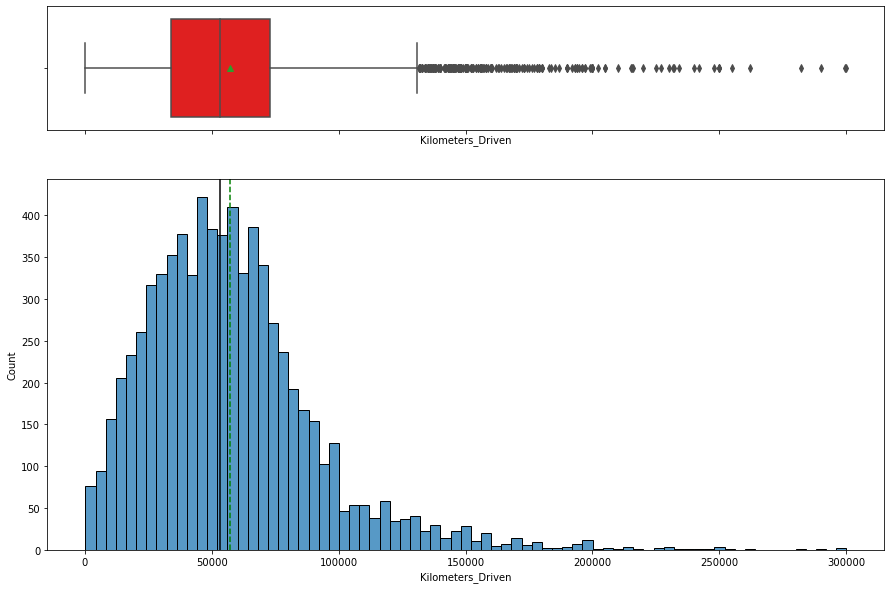

In [42]:
# Plotting the histogram and boxplot for Kilometers_Driven
box_hist(df.Kilometers_Driven)

We can see that the `Kilometers_Driven` is heavily right skewed and this will not help our model accuracy. So we will plot the distribution of a log transformed version of `Kilometers_Driven`and include that instead

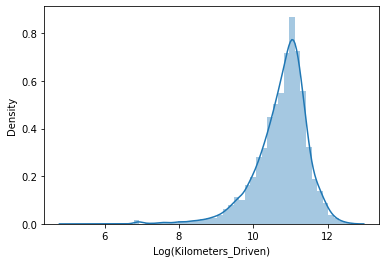

In [43]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(df["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

In [44]:
# We can add a transformed kilometers_driven feature in dataset
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

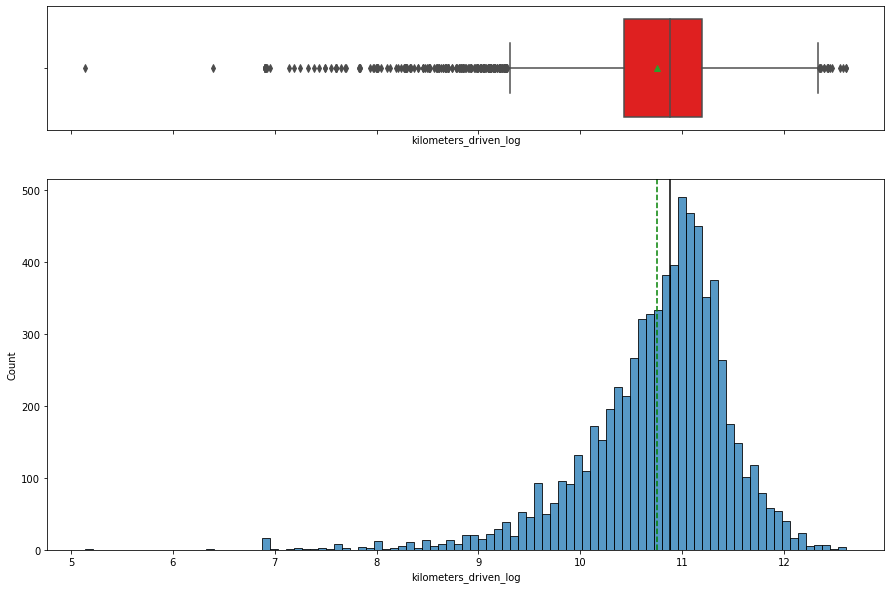

In [45]:
box_hist(df.kilometers_driven_log)

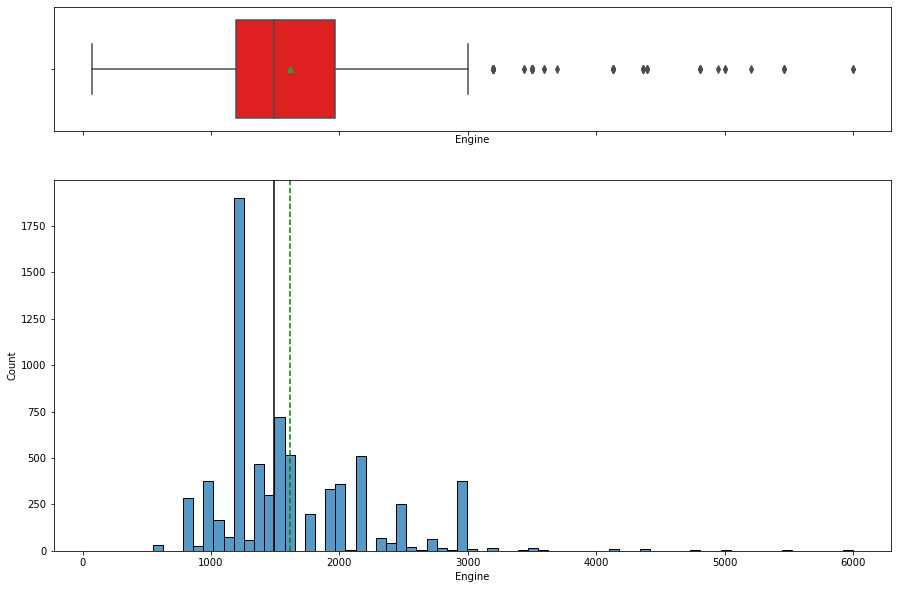

In [46]:
# Plotting the histogram and boxplot for Engine
box_hist(df.Engine)

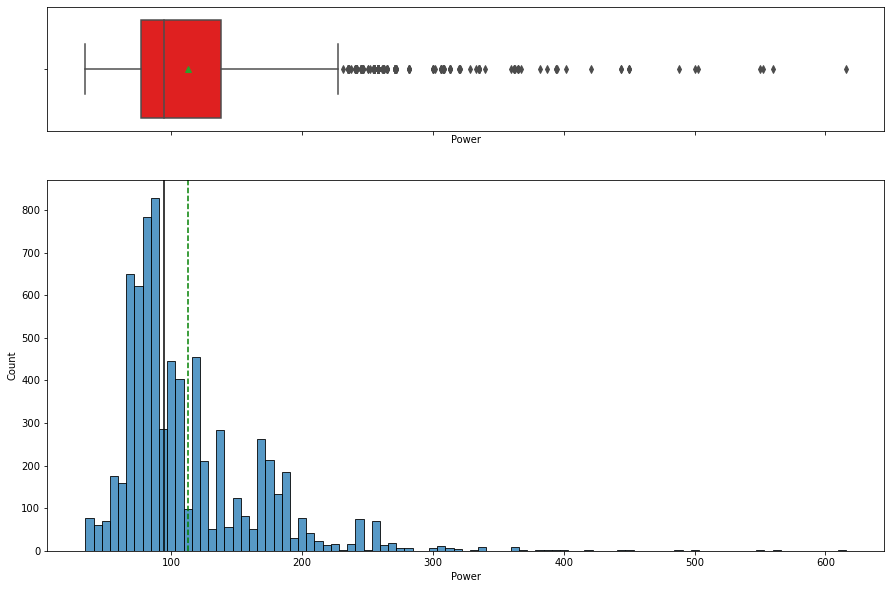

In [47]:
# Plotting the histogram and boxplot for Power
box_hist(df.Power)

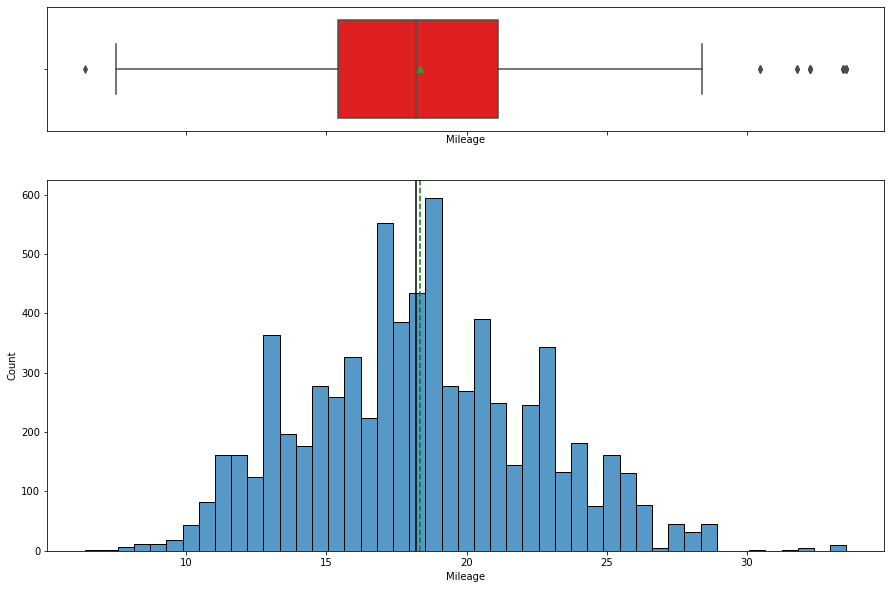

In [48]:
# Plotting the histogram and boxplot for Mileage
box_hist(df.Mileage)

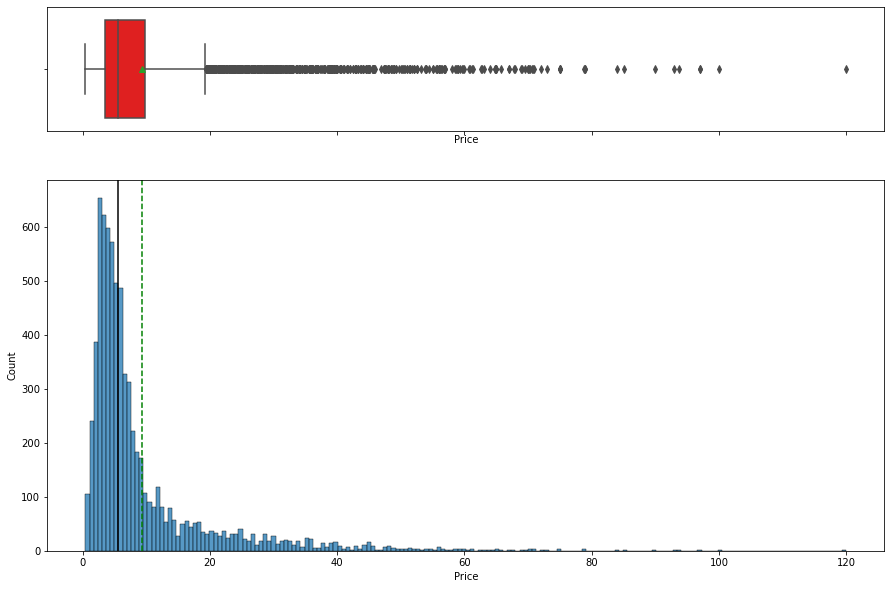

In [49]:
# Plotting the histogram and boxplot for Price
box_hist(df.Price)

We can also see that the `Price` is very heavily right skewed and this will not be helpful for our model accuracy. So we will plot the distribution of a log transformed version of `Price`and include that instead

**Let's take investigate these outliers in the Price column a little bit more closer by looking at our dataframe sorted by the Price column in a descending manner**

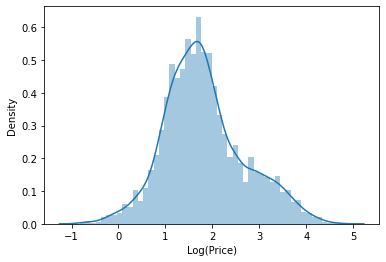

In [50]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(df["Price"]), axlabel = "Log(Price)");

In [51]:
# We can add a transformed kilometers_driven feature in dataset
df["Price_log"] = np.log(df["Price"])

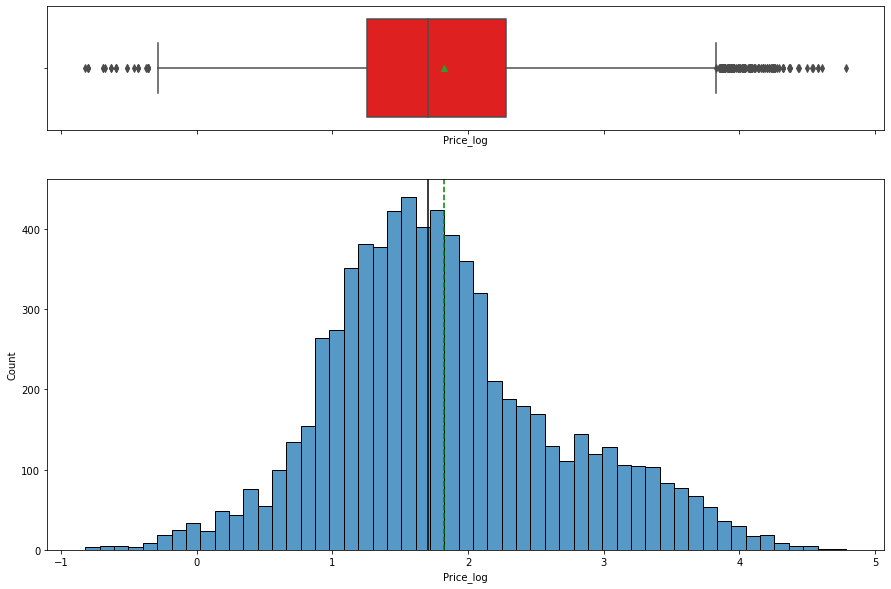

In [52]:
# Plotting the histogram and boxplot for Price_log
box_hist(df.Price_log)

The distribution of `Price_log` is now looking symmetrical. This is what we need for our model.

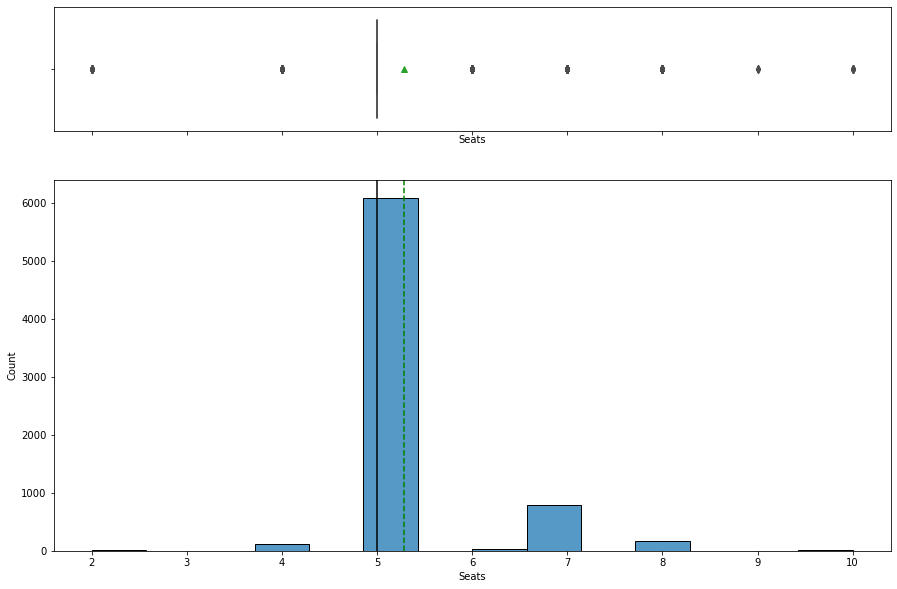

In [53]:
# Plotting the histogram and boxplot for Seats
box_hist(df.Seats)

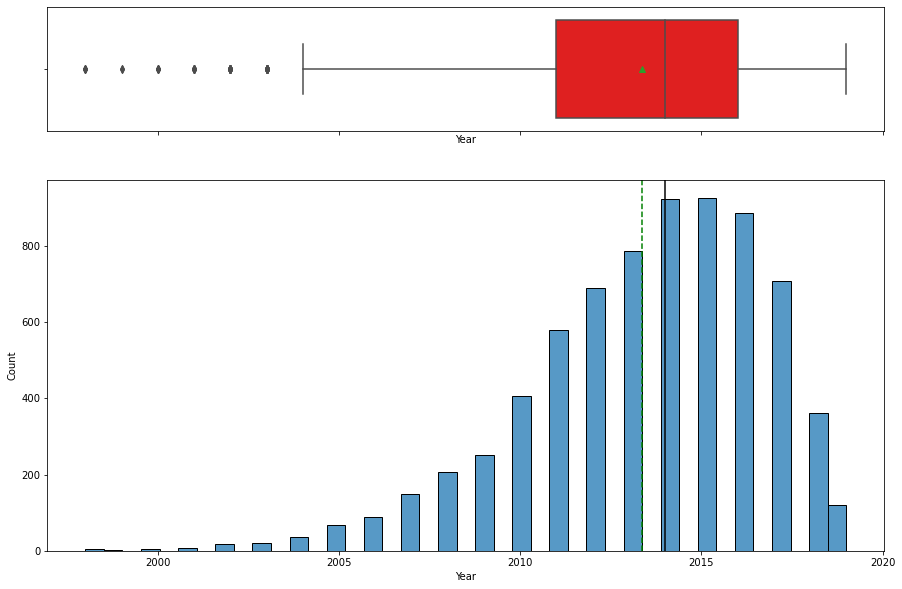

In [54]:
# Plotting the histogram and boxplot for Kilometers_Driven
box_hist(df.Year)

**Observations:**

- The distribution of `Price` and `Kilometers_Driven` are heavily right skewed. 
- `Power` and `Engine` have presence of outliers. They are also right-skewed.
- The distribution of `Mileage` is normal distribution 
- The `Year` feature is left skewed. There are more cars in the range of 2007 and above.
- We have also added the log transformation of Price (our target variable) and Kilometers_Driven to our dataset. 
- We can see improvements in the distribution of Price_Log and Kilometers_Driven_log. 
- We will apply Windsorization on Power, Engine, and Kilometers_Driven to see how that helps with handling outliers.

___________



### Univariate Analysis on Categorical Variables

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

**We'll start by mapping the locations to regions and Car Price to Luxury_Tier: to reduce complexities and make dataset more manageable** 

1. I think that the Age of a car will be a better feature for our model building. So the "Car_Age' will be the 'Current_Year' -  'Year'. We'll add that feature to the dataset and drop 'Current_Year'. 

2. To reduce the complexities of working with a large number of categories in our analysis and make the locations feature more manageable, we will map the locations in our dataset to the regions of India where they belong. We will add a new categorical feature `Region`.

2. We will also introduce a `Luxury_Tier` which is a tiering of the cars with regards to the Price.

In [55]:
# Task 1: Create a new column 'Current_Year' and fill it with 2022
df['Current_Year'] = 2022

# Task 2: Create a new column 'Car_Age' and calculate the age of each car
df['Car_Age'] = df['Current_Year'] - df['Year']

In [56]:
# We do not need the 'Current_Year' column again. So we'll drop it
df.drop('Current_Year', axis=1, inplace=True)

In [57]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,kilometers_driven_log,Price_log,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,11.184421,0.559616,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,10.621327,2.525729,7
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,10.736397,1.504077,11


In [58]:
# Define the mapping of locations to regions
location_to_region = {
    'Mumbai': 'West',
    'Pune': 'West',
    'Ahmedabad': 'West',
    'Delhi': 'North',
    'Jaipur': 'North',
    'Chennai': 'South',
    'Coimbatore': 'South',
    'Hyderabad': 'South',
    'Bangalore': 'South',
    'Kochi': 'South',
    'Kolkata': 'East'
}

# Create a new feature 'region' based on the mapping
df['Region'] = df['Location'].map(location_to_region)

In [59]:
df["Luxury_Type"] = pd.cut(df["Price"],
                        bins=[-np.inf,5.5,10.5,20.5,45.0,75.0,np.inf],
                        labels=["Regular", "Deluxe", "Executive", "Premium", "Standard Luxury", "Super Luxury"])

In [60]:
df["Luxury_Type"].value_counts()

Regular            3630
Deluxe             1914
Executive           895
Premium             673
Standard Luxury     119
Super Luxury         12
Name: Luxury_Type, dtype: int64

**Observations:**

- We have sort of grouped the cars in the dataset into price ranges with `Regular` being cars from 5050INR and below, the price of `Deluxe` cars range from 5500INR to 10,500INR, `Executive` cars range from 10,500INR to 20,500INR, `Premium` cars range from 20,500INR to 45,000INR, `Standard Luxury` cars range from 45,000INR to 75,000INR while the most expensive cars are the `Super Luxury` cars which range from 75,000INR and above.

- This kind of grouping allows us to easily perform analysis to gain insights from the dataset in a more manageable manner.


In [171]:
# Assuming your dataframe is named 'df'
luxury_type_stats = df.groupby('Luxury_Type').agg({'Luxury_Type': 'count', 'Price': 'sum'})

# Rename the columns for clarity
luxury_type_stats.columns = ['Count', 'Total_Price']

# Display the resulting dataframe
luxury_type_stats

,Count,Total_Price
Luxury_Type,,
Regular,3630,12551.780
Deluxe,1914,14112.255
Executive,895,13093.665
Premium,673,20047.815
Standard Luxury,119,6704.120
Super Luxury,12,1096.570


**Let's define a function that we'll use for the univariate analysis of the categorical variables**

In [61]:
def plot_categorical_histogram(data, feature, perc=False, n=None):
    plt.figure(figsize=(14, 10))
    
    if n is None:
        n = len(data[feature].unique())
    
    if perc:
        total_count = len(data)
        top_n_levels = data[feature].value_counts().head(n).index
        data_filtered = data[data[feature].isin(top_n_levels)]
        
        ax = sns.countplot(x=feature, data=data_filtered, palette='muted')
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    f'{(height/total_count)*100:.2f}%',
                    ha="center")
    else:
        top_n_levels = data[feature].value_counts().head(n).index
        data_filtered = data[data[feature].isin(top_n_levels)]
        
        ax = sns.countplot(x=feature, data=data_filtered, palette='muted')
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    f'{int(height)}',
                    ha="center")
    
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()
    plt.show()

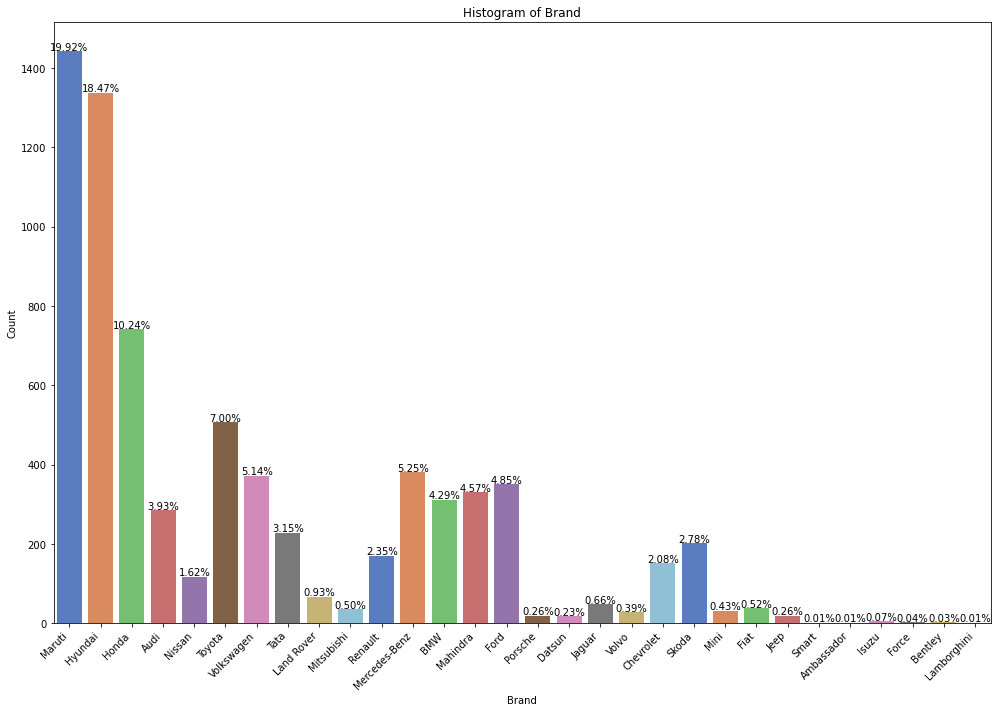

In [62]:
plot_categorical_histogram(df, 'Brand', perc=True)

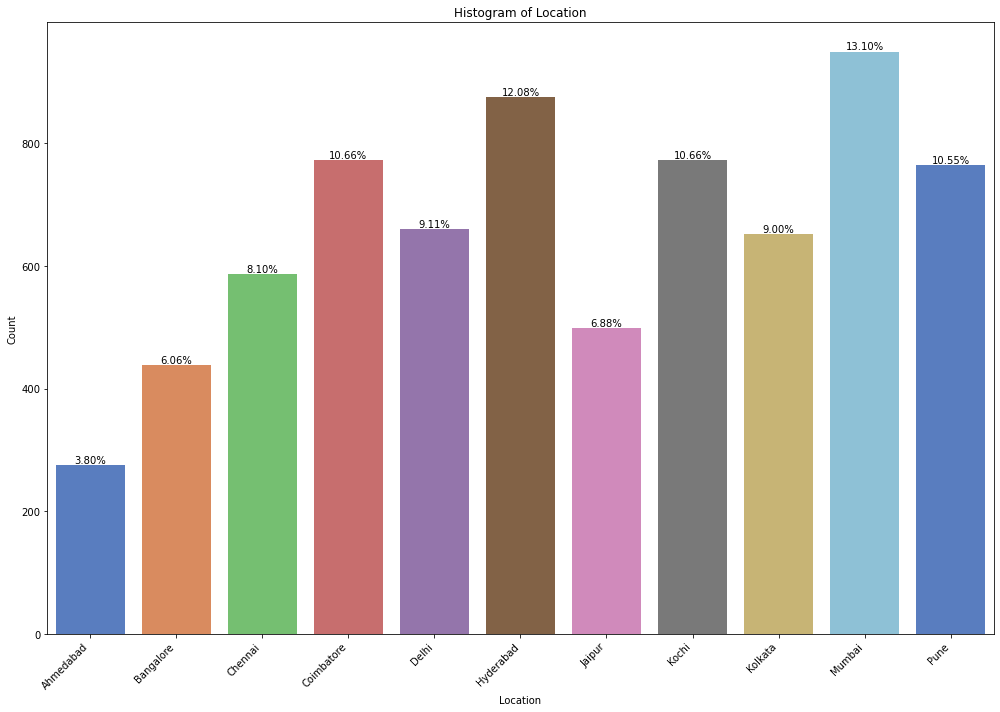

In [63]:
plot_categorical_histogram(df, 'Location', perc=True)

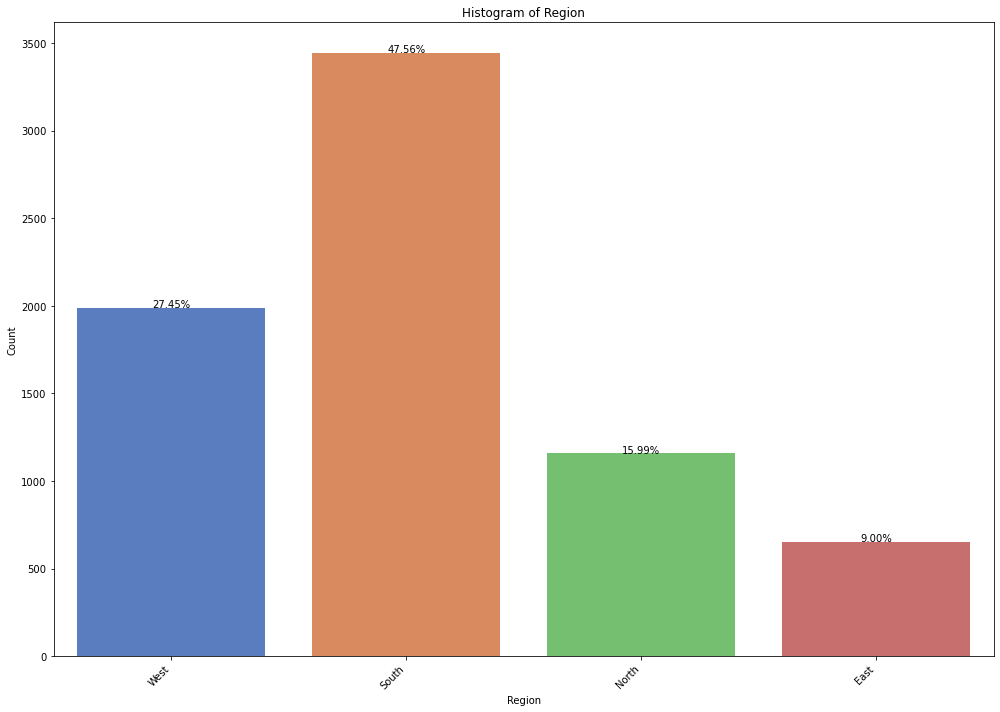

In [64]:
plot_categorical_histogram(df, 'Region', perc=True)

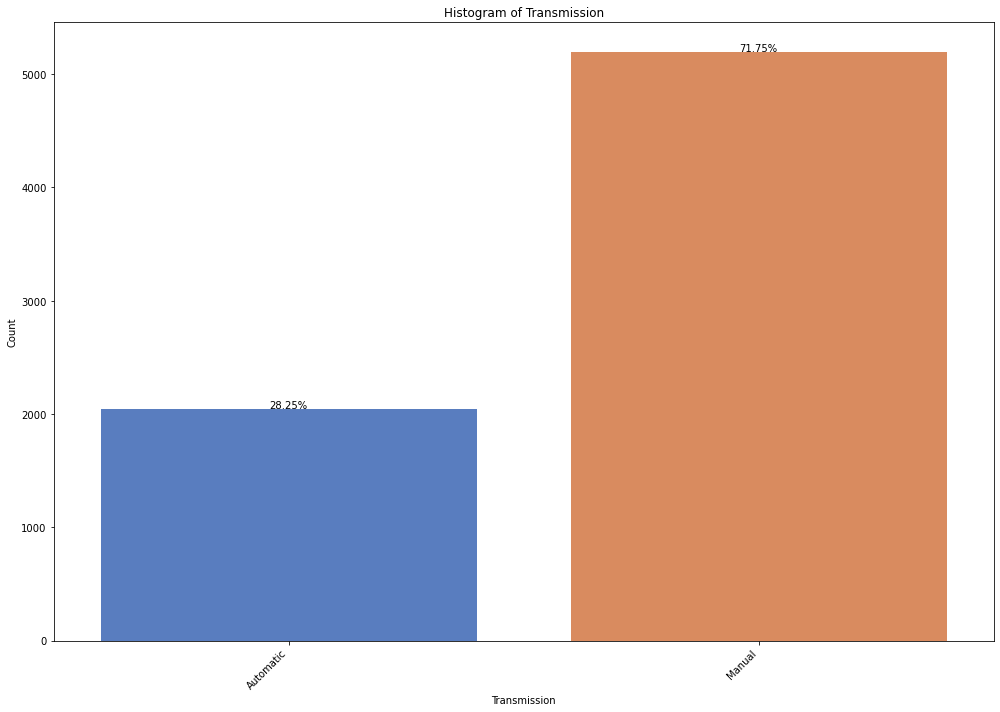

In [65]:
plot_categorical_histogram(df, 'Transmission', perc=True)

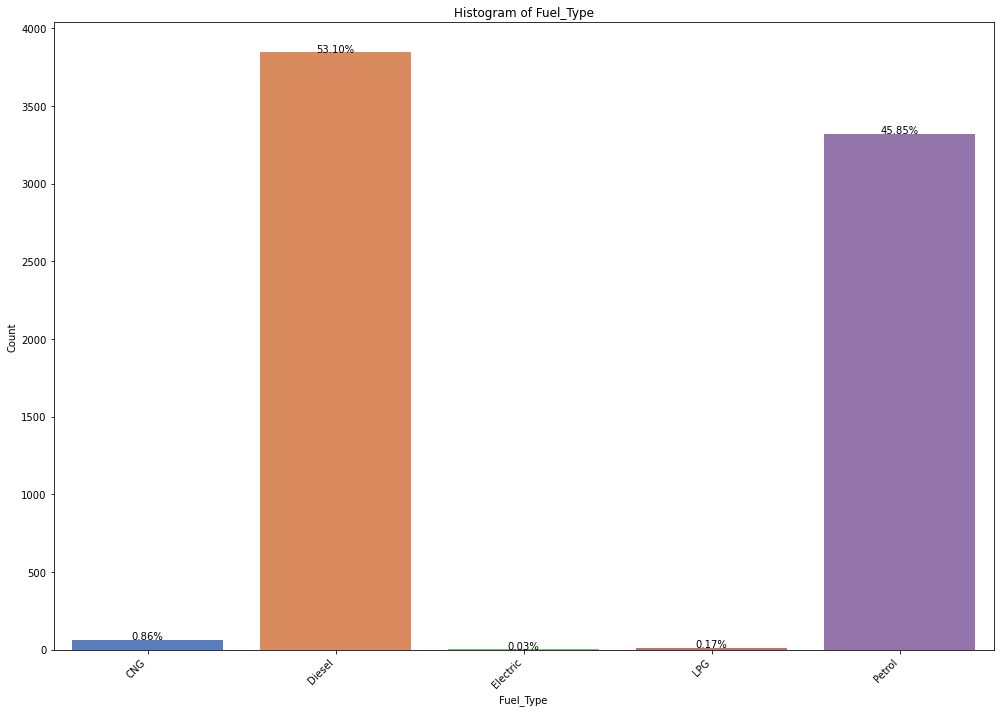

In [66]:
plot_categorical_histogram(df, 'Fuel_Type', perc=True)

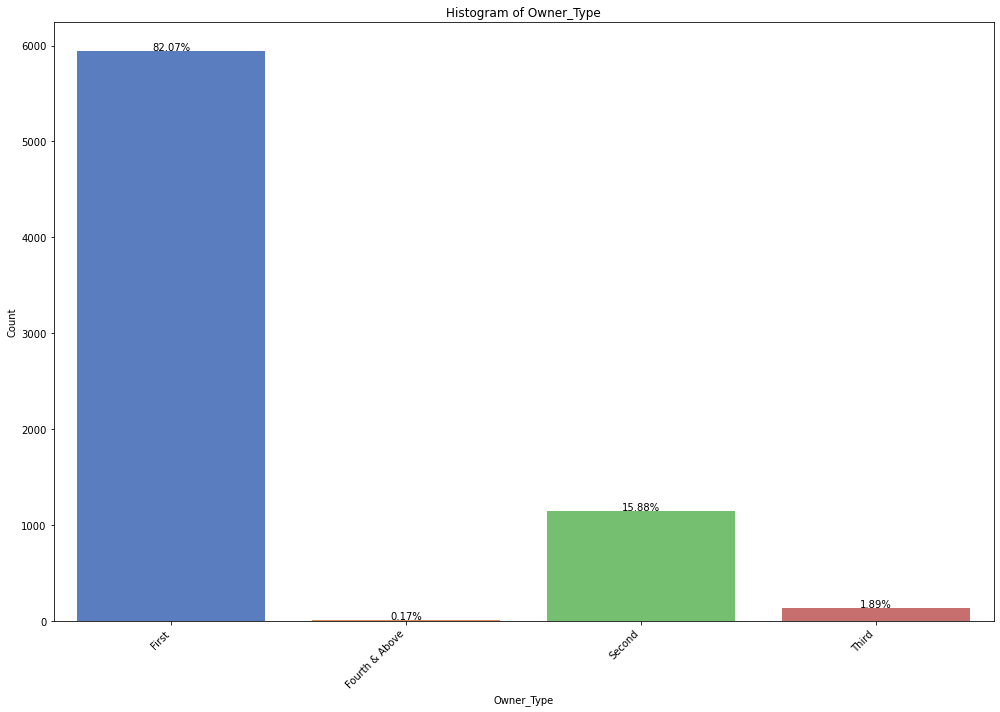

In [67]:
plot_categorical_histogram(df, 'Owner_Type', perc=True)

**Observations:**

- More cars **(47.6% or 3499 units)** were sold in the **South** (and we can see why because this region which includes `'Chennai'`, `'Coimbatore'`, `'Hyderabad'`, `'Bangalore'` has more locations in our dataset).
- Over 71% of all cars in this dataset are **Manual** transmission. 
- Most of the cars **(over 82%)** have had only 1 previous owner.
- Of the 7200 plus cars in our dataset, **53.3% (that is 3088 cars)** use diesel. This is followed closely by petrol cars **(2651 cars that is 45.7% of all the cars)**. The others `(CNG, Electric and LPG)` make up **less than 1.2%** of all the cars.
- The **top 10 car brands** from a glance are Maruti, Hyundai, Honda, Toyota, Mercedes Benz, Volkswagen, Ford, Mahindra, BMW and Audi.
- Mumbai is the highest selling location in the dataset. This is followed closely by Hyderabab, Coimbatore and Pune.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

### Let's start with a Scatter Plot of the dependent variable and the independent variables

**Let's write a function for this comparison**

In [68]:
def scatter_plot(data, x_column, y_column, hue_column=None):
    plt.figure(figsize=(16, 8))
    if hue_column is None:
        sns.scatterplot(data=data, x=x_column, y=y_column)
    else:
        sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    plt.show()


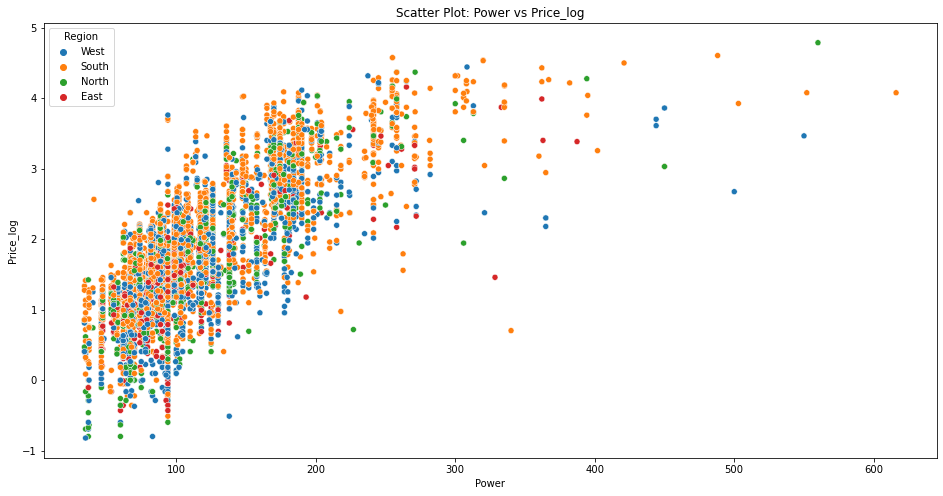

In [69]:
scatter_plot(df, 'Power', 'Price_log', hue_column='Region')

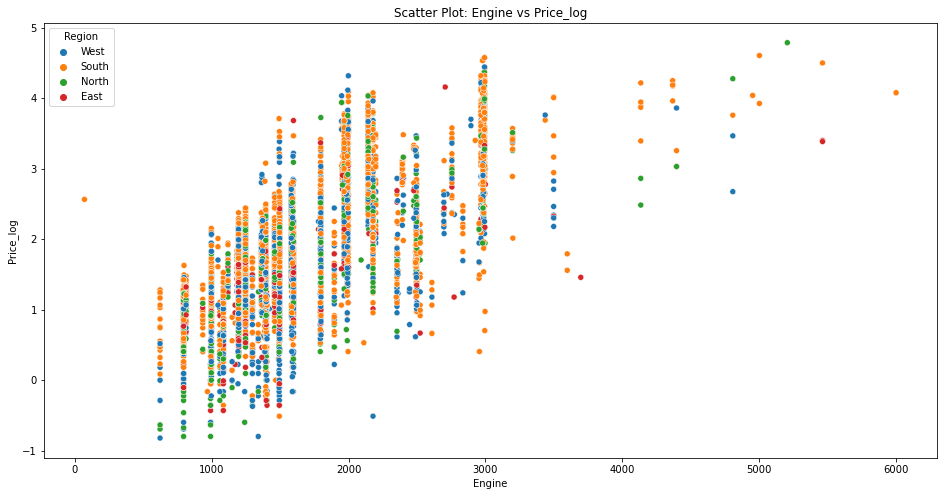

In [70]:
scatter_plot(df, 'Engine', 'Price_log', hue_column='Region')

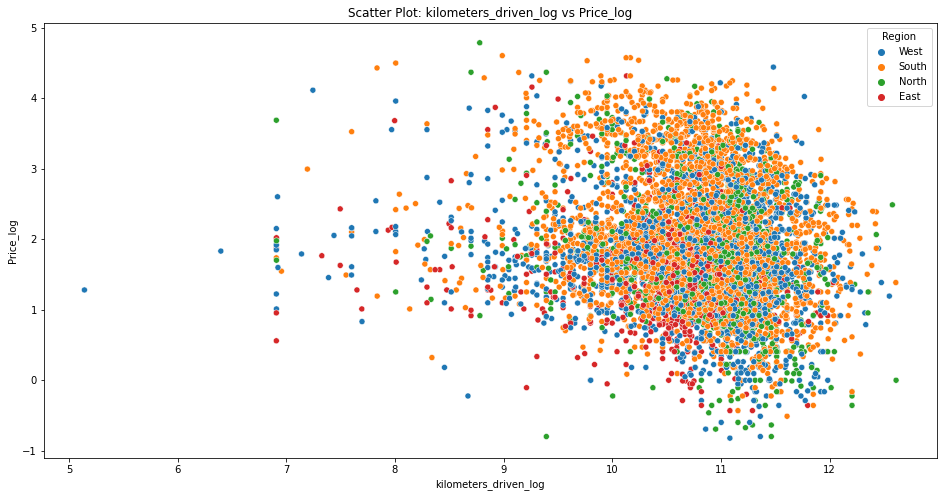

In [71]:
scatter_plot(df, 'kilometers_driven_log', 'Price_log', hue_column='Region')

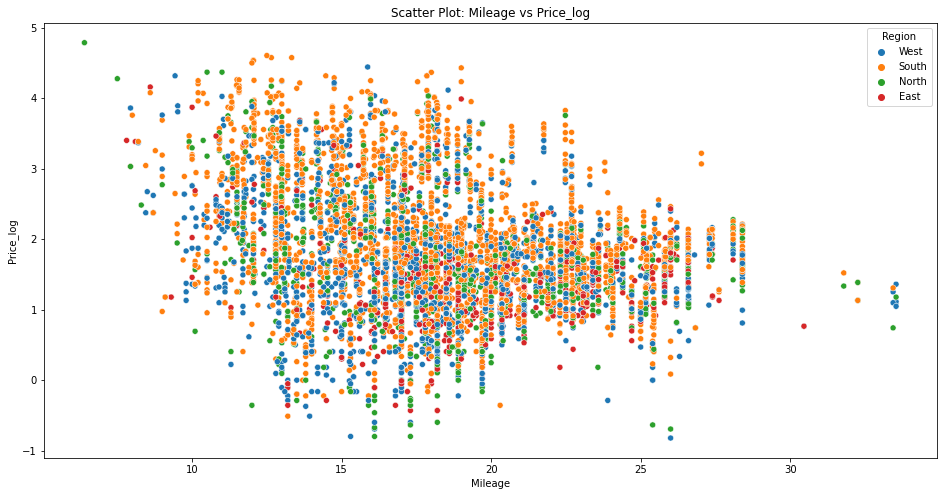

In [72]:
scatter_plot(df, 'Mileage', 'Price_log', hue_column='Region')

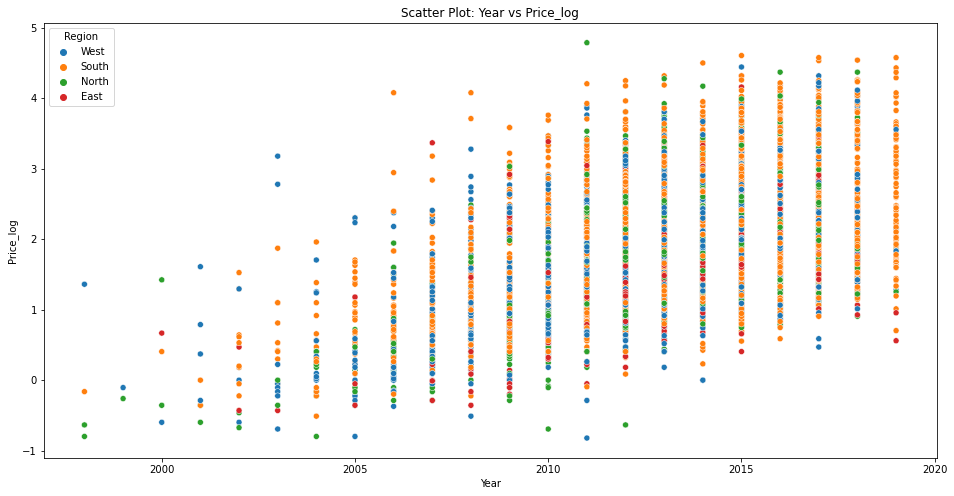

In [73]:
scatter_plot(df, 'Year', 'Price_log', hue_column='Region')

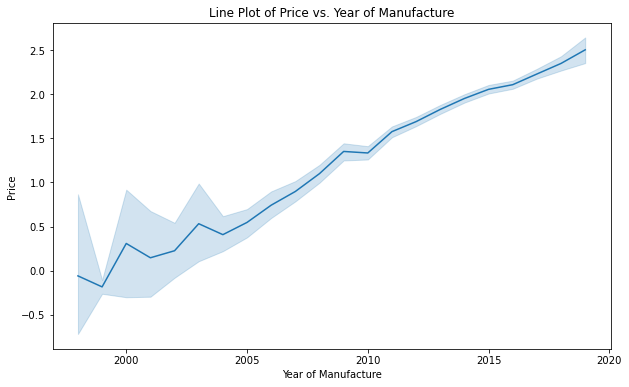

In [74]:
# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price_log', data=df)
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.title('Line Plot of Price vs. Year of Manufacture')
plt.show()

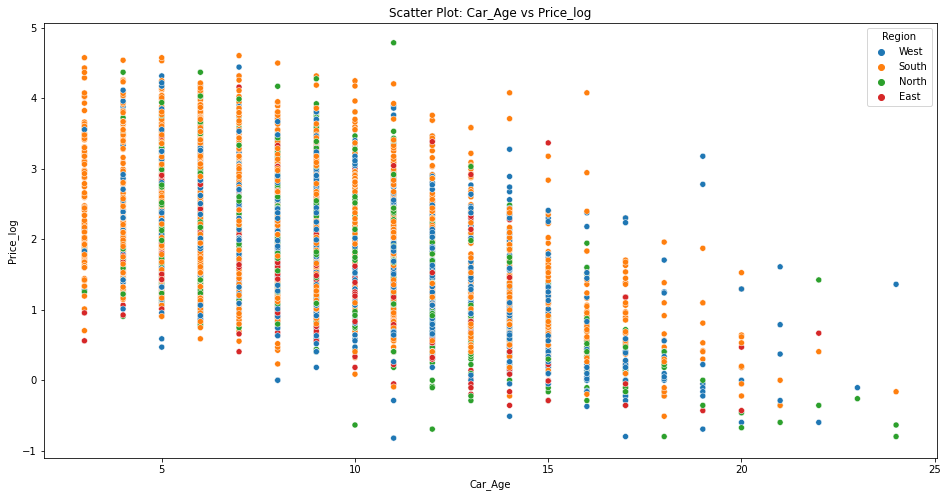

In [75]:
scatter_plot(df, 'Car_Age', 'Price_log', hue_column='Region')

**Observations and Insights:**

- There is also a strong relationship between Engine and Price. The more the engine capacity the more the price of the car.
- There is a slight negative correlation between Price and Kilometers_Driven. The more kilometers a car has covered, the lesser the price even though this is to a small extend.
- There's a moderate to high negative correlation between Price and the Mileage of a car. The Mileage of a car has to do with how far it can go on a certain amount of fuel. So we see here that the less distance a car can cover with a certain amount of fuel when compared with other cars, then the more pricey the car. This shows that the expensive cars will have lesser mileage.
- We observe also that the newer the car, the higher the price of the car.

### Bivariate Analysis of the Target Variable and Categorical Variables

In [76]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (14, 8)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = df['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (14, 8))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = df['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

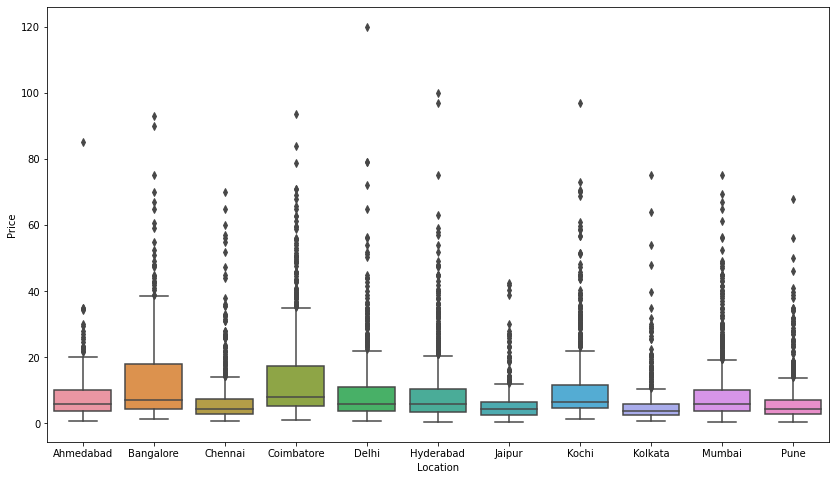

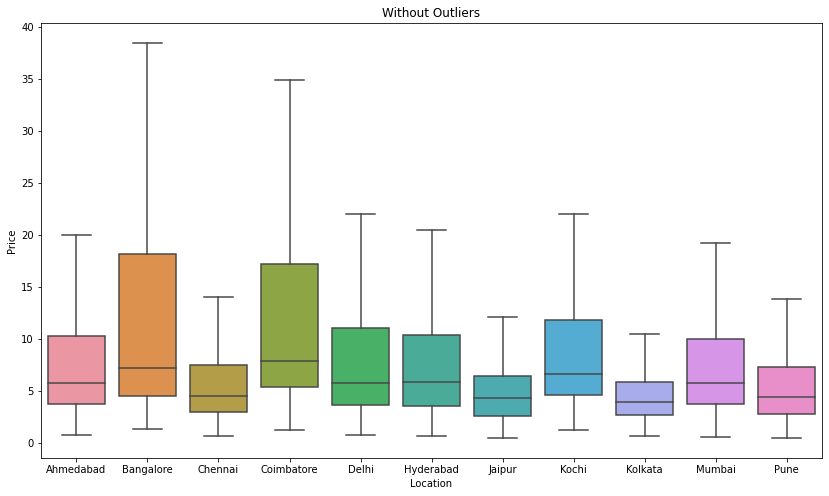

In [77]:
# Box Plot: Price vs Location
boxplot(df['Location'])

**Observations and Insights:**

- With the outliers switched off, we get thegeneral pattern or trend exhibited in the different locations of our dataset. 
- Generally the price of cars are not significantly different from location to location.
- Generally the price of cars vary in different locations but the difference is not so much (maybe 500INR to about 1000INR)

- Cars are more expensive in locations like Ahmedabad, Hyderabad, Bangalore, Coimbatore, Delhi, Mumbai, Kochi than the other locations

- We also see in locations like Bangalore, Coimbatore, Delhi, and some others there are some exceptions in the pricing where we see cars that their prices tend to deviate very well from the mean price in such locations.

- There is a strong linear relationship between Price and Power across all the regions in our dataset. The more the performance of the car, the more pricey the car will be.

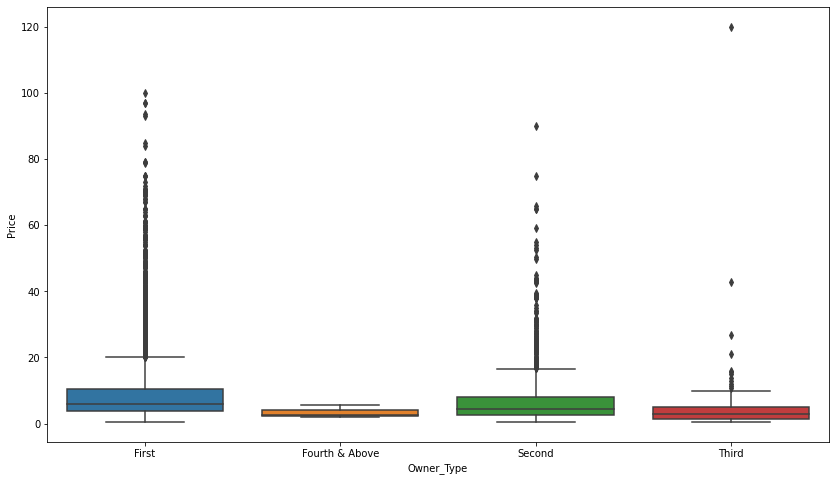

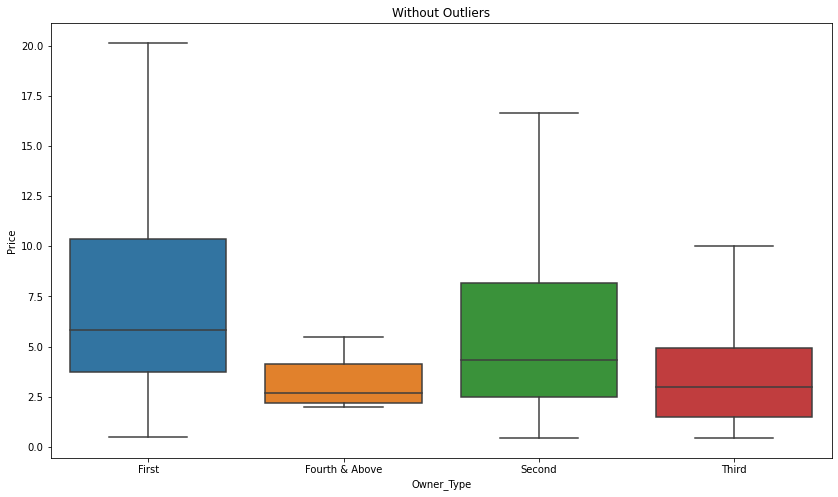

In [78]:
# Box Plot: Price vs Owner_Type
boxplot(df['Owner_Type'])

**Observations and Insights:**

- Cars previously owned by 1 or 2 persons are more expensive when than when the number of previous owners begin to exceed 2.
- Cars previously owned by a single individual are more expensive.
- So definitely the number of previous owners of a car can help us predict the price of the car

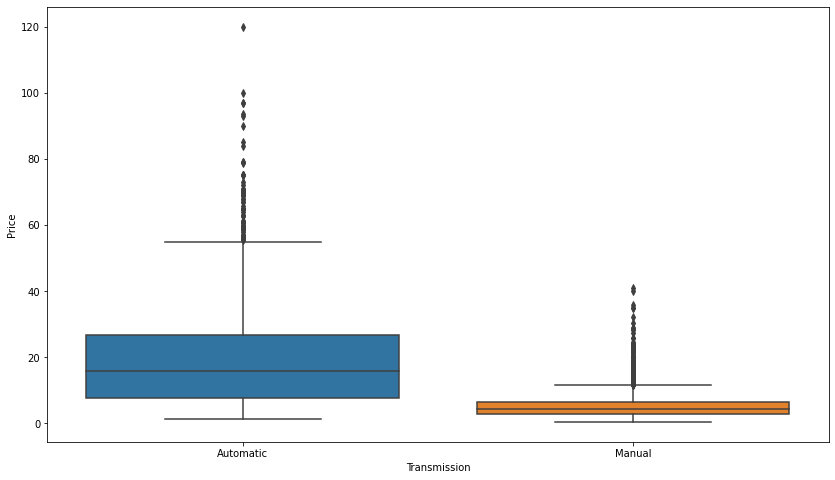

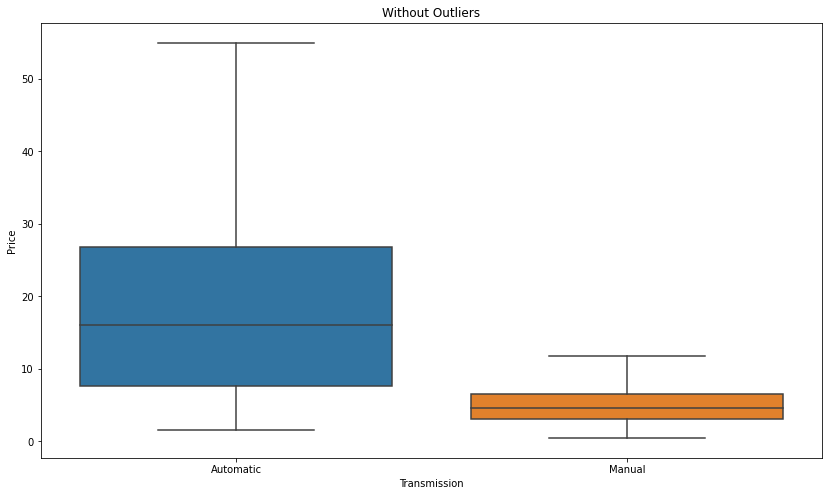

In [79]:
# Box Plot: Price vs Transmission
boxplot(df['Transmission'])

**Observations and Insights:**

- Automatic transmission cars are more expensive 

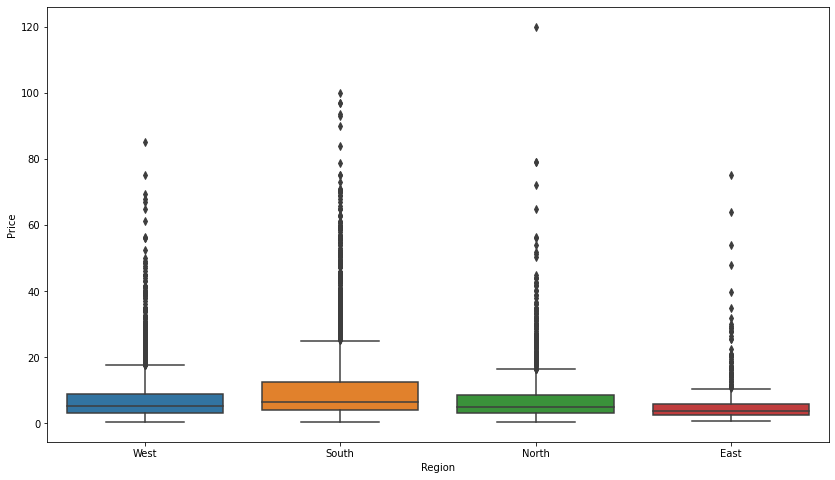

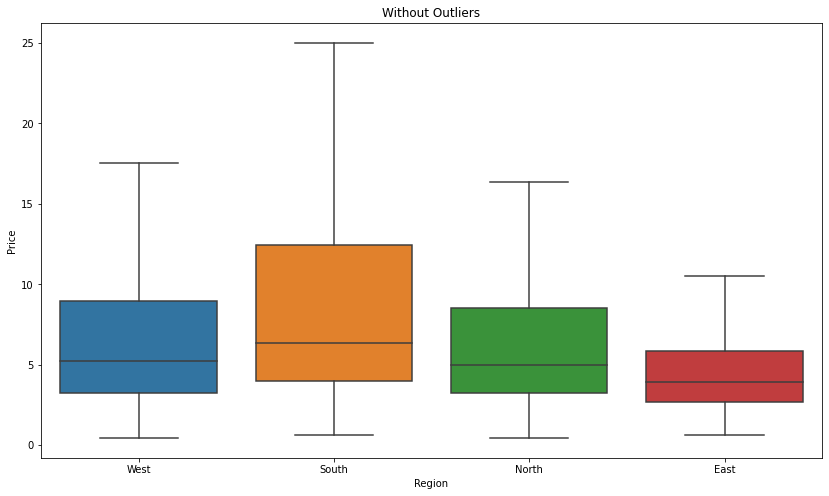

In [80]:
# Box Plot: Price vs Region
boxplot(df['Region'])

**Observations:**

- There are more cars listed from the South in our dataset.
- The prices of cars slightly go up as you go South. It's cheapest in the East while there isn't any significant difference between the North and West. 

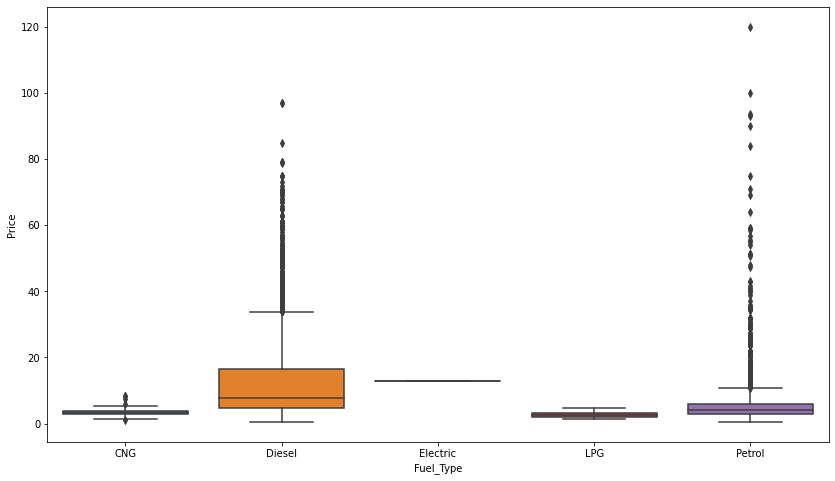

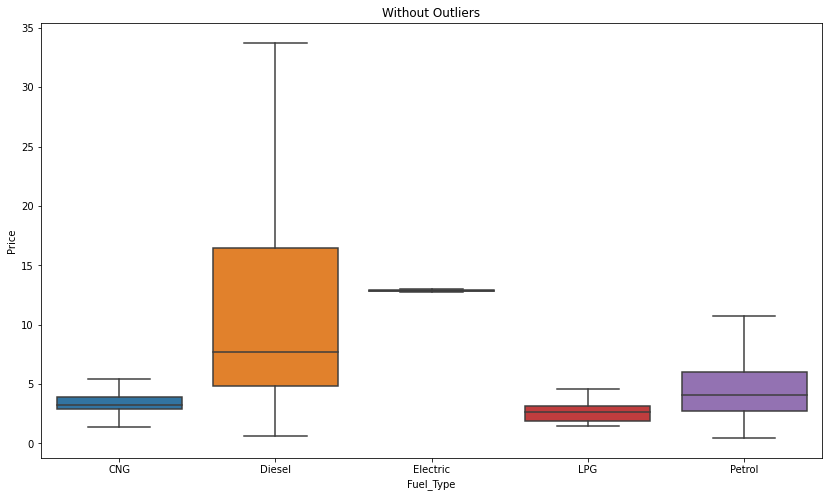

In [81]:
# Box Plot: Price vs Luxury_Type
boxplot(df['Fuel_Type'])

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price_log'>

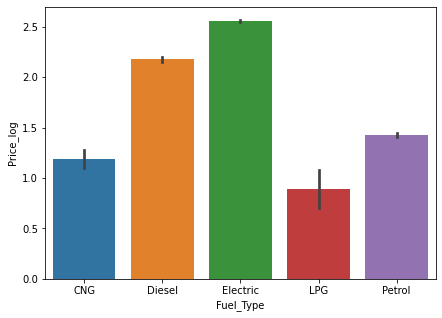

In [82]:
# How does type of Fuel affect car price
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Fuel_Type',y='Price_log')

**Observations:**

- While electric cars are generally more expensive by far compared to the other types of fuel cars, diesel cars seem to also be more expensive than the remaining 3 even showing that some diesel and petrol cars are more expensive than even electric cars. 

### **Let's explore different combinations of variables to understand the relationship between Different variables.**

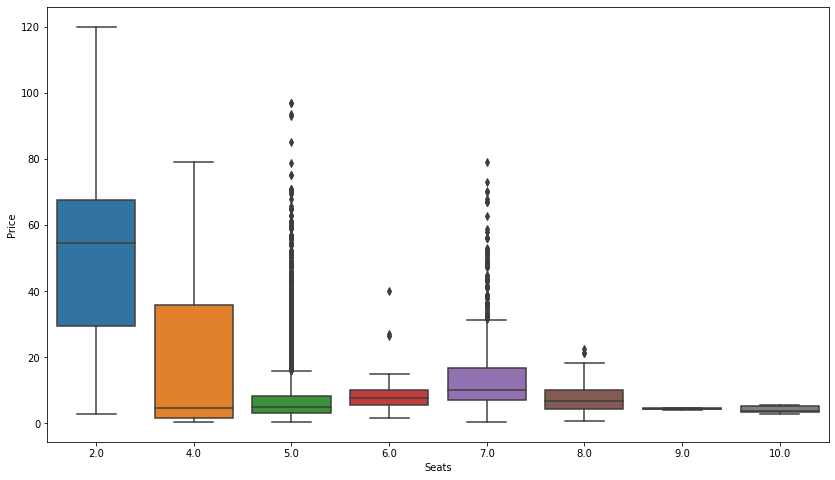

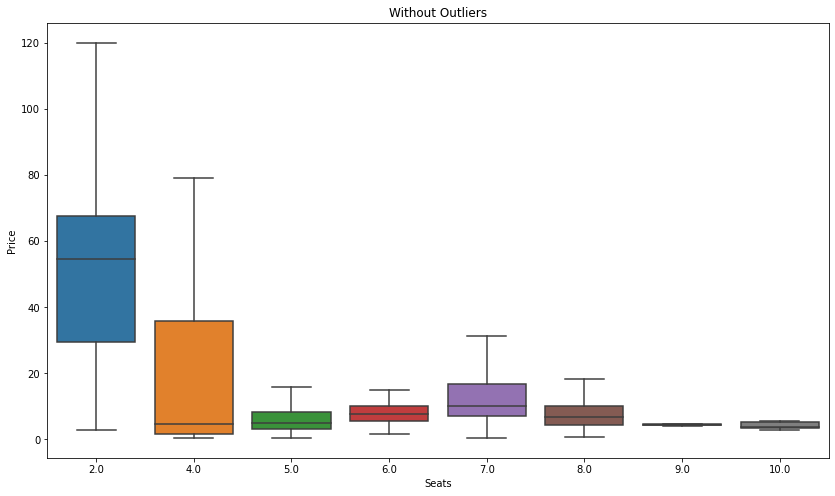

In [83]:
# Box Plot: Price vs Seats
boxplot(df['Seats'])

**Observations:**

- We see that 2 seater cars are more expensive by a wider margin than the other cars. Their average price is almost 55,000 INR while the average price of 5 seater cars is less than 5,000 INR. The 6 to 8 seaters are slightly more expensive than the 5 seater cars

In [84]:
two_seater_cars = df[df['Seats'] == 2][['Brand', 'Fuel_Type', 'Price']]
two_seater_cars

,Brand,Fuel_Type,Price
134,Mercedes-Benz,Petrol,54.00
557,Audi,Petrol,29.50
693,Mercedes-Benz,Petrol,55.54
798,Mercedes-Benz,Petrol,55.00
915,Smart,Diesel,3.00
926,Porsche,Petrol,40.00
1078,Porsche,Petrol,64.00
1288,Audi,Petrol,27.35
2095,Mercedes-Benz,Petrol,83.96
2305,Porsche,Petrol,43.00


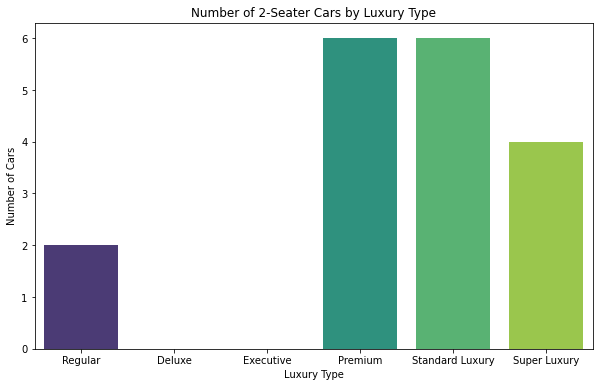

In [85]:
# Filter the dataframe for 2-seater cars
two_seater_cars = df[df['Seats'] == 2]

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=two_seater_cars, x='Luxury_Type', palette='viridis')

# Customize the plot
plt.title('Number of 2-Seater Cars by Luxury Type')
plt.xlabel('Luxury Type')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()

**Observations:**
- We have only 18 2-seater cars in our dataset and only 1 of them runs on diesel. Only 2 are in the regular car luxury tier and below 5,000 INR in price. The rest of the 2-seater cars are of premium to Super luxury tiers. 

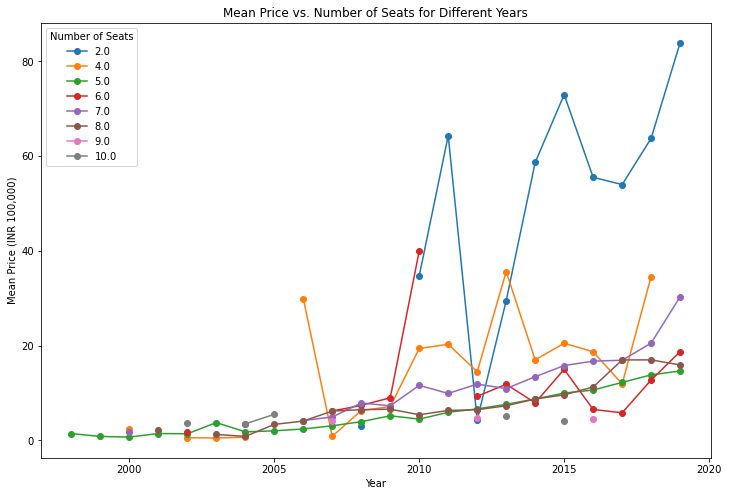

In [86]:
# Group the data by 'Year' and 'Seats' and calculate the mean price for each group
grouped_data = df.groupby(['Year', 'Seats'])['Price'].mean().reset_index()

# Pivot the data to have 'Year' as columns and 'Seats' as index
pivot_data = grouped_data.pivot(index='Seats', columns='Year', values='Price')

# Plot the line plot
plt.rcParams['figure.figsize'] = (12, 8)  # Set the plot size
pivot_data.T.plot(marker='o')

# Customize the plot
plt.title('Mean Price vs. Number of Seats for Different Years')
plt.xlabel('Year')
plt.ylabel('Mean Price (INR 100,000)')
plt.legend(title='Number of Seats')

# Show the plot
plt.show()

**Observations:**

- As the car gets newer, 2 seater cars are way more expensive (more than tripple the price of) than the other seat type cars. The 4 seater cars come next in terms of mean price having a mean price that's half of the mean price of the 2 seater cars.   

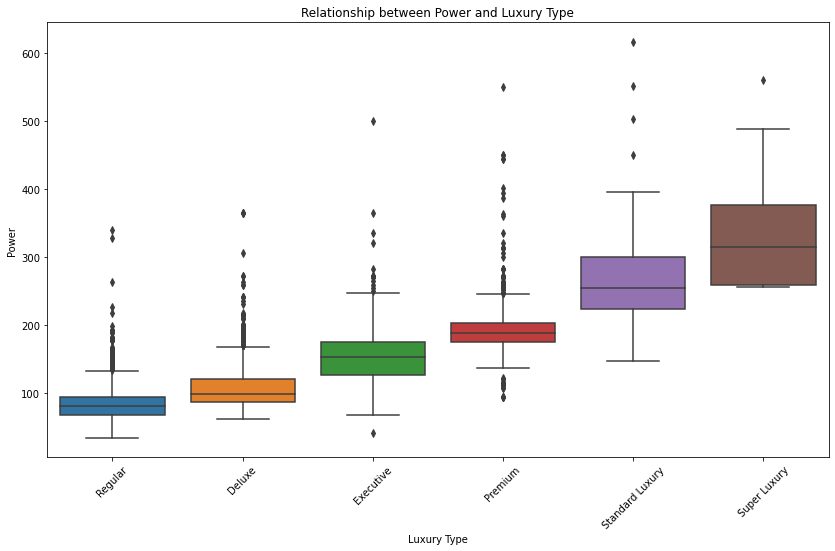

In [87]:
# Create a box plot 
plt.figure(figsize=(14, 8))
sns.boxplot(x='Luxury_Type', y='Power', data=df)
plt.xlabel('Luxury Type')
plt.ylabel('Power')
plt.title('Relationship between Power and Luxury Type')
plt.xticks(rotation=45)
plt.show()

**Observations**:

- Generally, the more power a car has, the higher the luxury tier the car belongs to and the higher the price of the car. 
- Although there are some exceptions to this general rule. We can see from the plot above that more expensive the price range of a car, the more powerful that car will be which invariably is a result of the car engine capacity. 

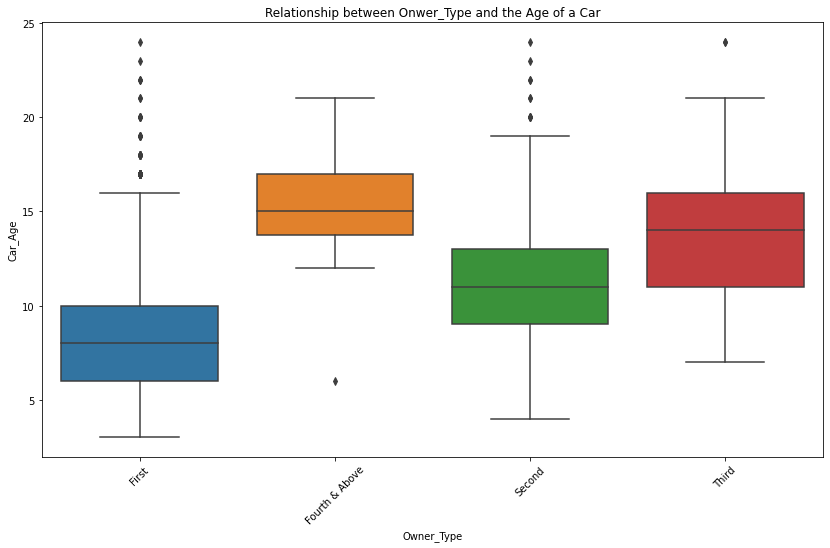

In [88]:
# Create a box plot 
plt.figure(figsize=(14, 8))
sns.boxplot(x='Owner_Type', y='Car_Age', data=df)
plt.xlabel('Owner_Type')
plt.ylabel('Car_Age')
plt.title('Relationship between Onwer_Type and the Age of a Car')
plt.xticks(rotation=45)
plt.show()

**Observations:**

The older a car is the more owners that car tends to have had. Older cars have had more owners than the newer cars

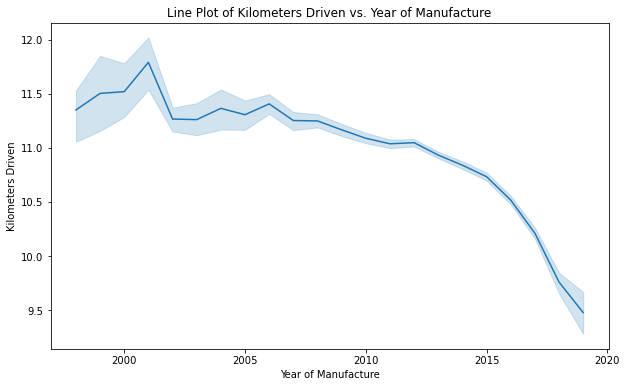

In [89]:
# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='kilometers_driven_log', data=df)
plt.xlabel('Year of Manufacture')
plt.ylabel('Kilometers Driven')
plt.title('Line Plot of Kilometers Driven vs. Year of Manufacture')
plt.show()

**Observations:**

- The older the car, the higher the kilometers it has covered

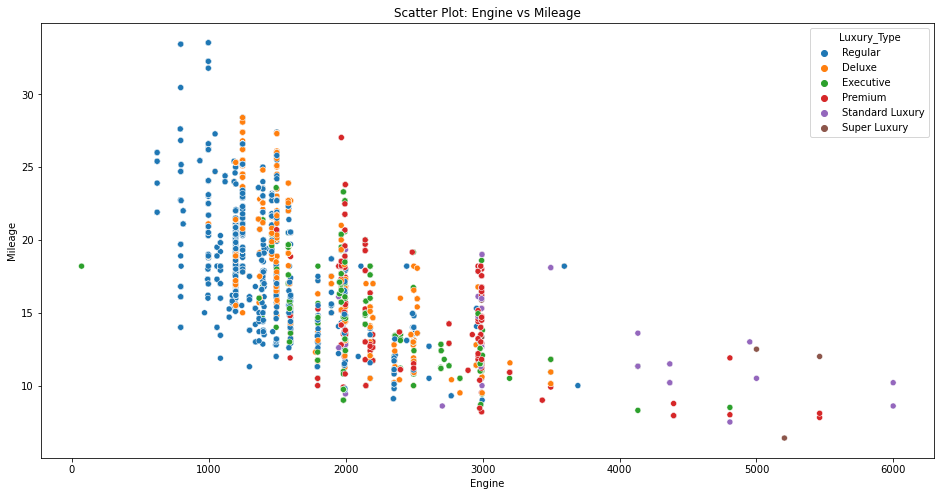

In [90]:
scatter_plot(df, 'Engine', 'Mileage', hue_column='Luxury_Type')

**Observations**:

- We see some sort of negative correlation between Mileage and Engine. Cars with higher Mileage have lesser Engine capacity.
- This negative correlation suggests that though cars with larger engines (Premium, Standard luxury and super luxury cars) may offer more power and performance, they also consume more fuel, resulting in lower fuel efficiency or lower mileage (that is the distance a car can travel on a certain amount of fuel).
- We can see that cars in the cheaper range (regular, delux and executive) have more mileage with less engine capacity. They are far more fuel efficient than the premium to Super luxury cars even though those ones are far more expensive.

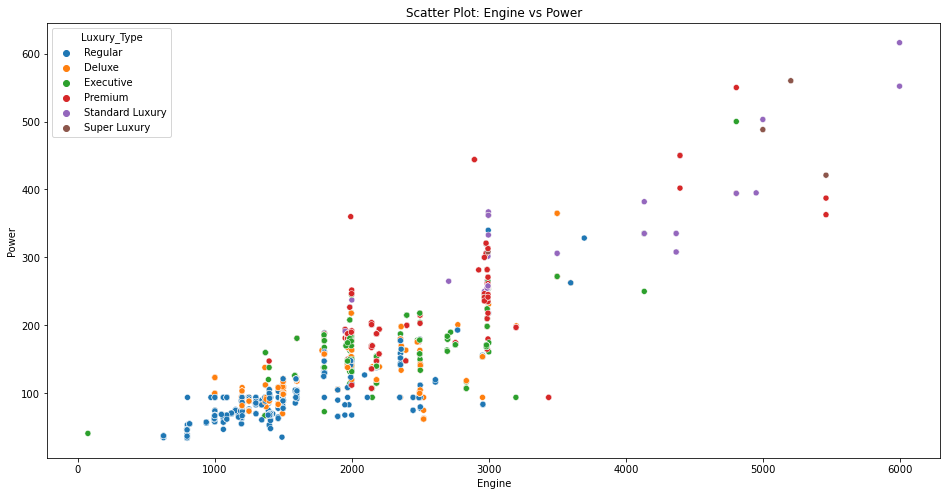

In [91]:
scatter_plot(df, 'Engine', 'Power', hue_column='Luxury_Type')

**Observations**:

- `Power` and `Engine` are positively correlated. In other words as the Power of a car increases so does the Engine capacity. This is suppossed to be obvious because when the engine displacement (which refers to the total volume of all the cylinders in an engine) is larger that engine can accommodate a greater volume of air and fuel during the combustion process. This larger volume allows for more fuel to be burned, which results in a larger release of energy and power generation.

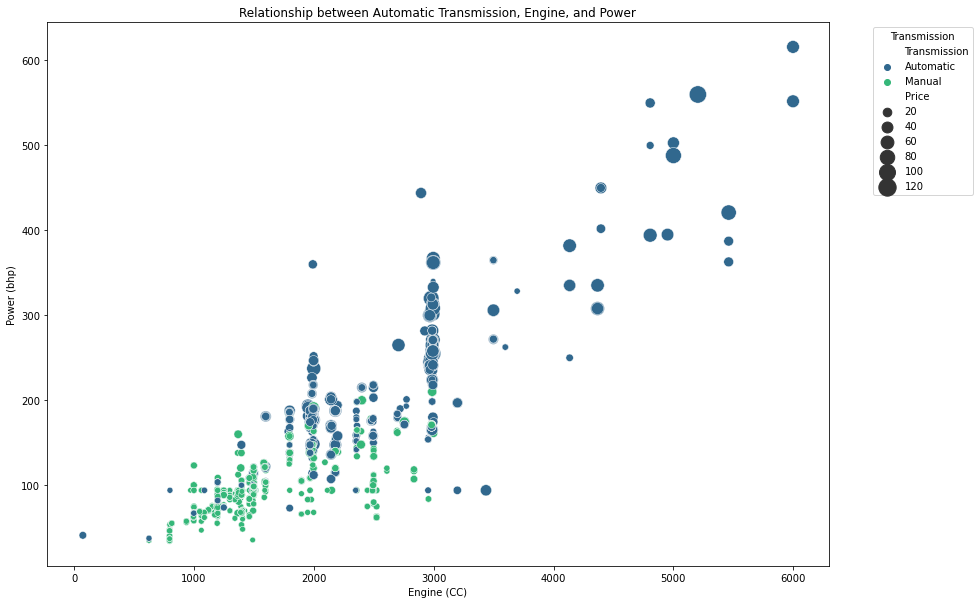

In [92]:
# Create the scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='Engine', y='Power', hue='Transmission', palette='viridis', size='Price', sizes=(30, 300))

# Customize the plot
plt.title('Relationship between Automatic Transmission, Engine, and Power')
plt.xlabel('Engine (CC)')
plt.ylabel('Power (bhp)')
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

**Observations:**

- Automatic transmission require high engine and power.


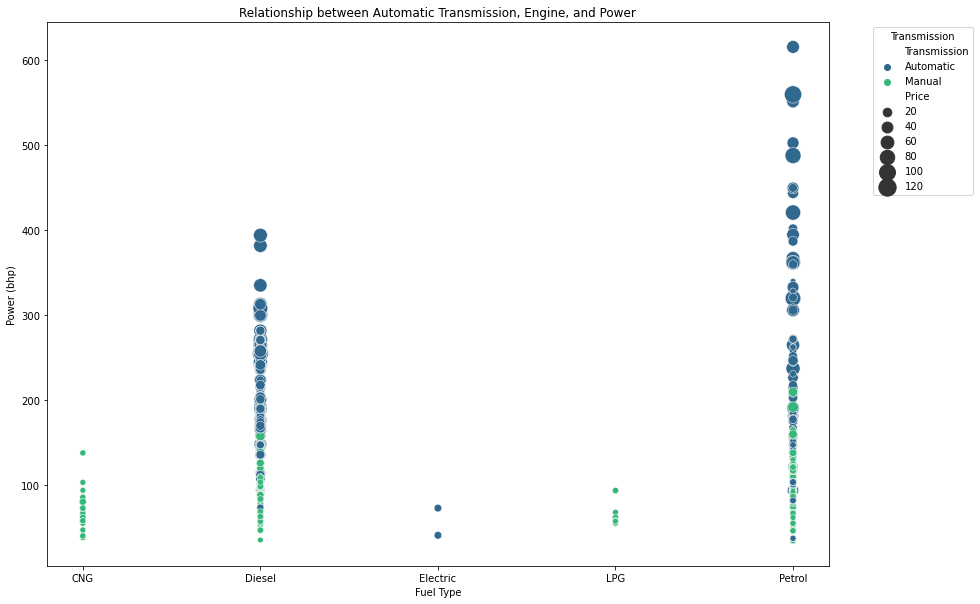

In [93]:
# Create the scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='Fuel_Type', y='Power', hue='Transmission', palette='viridis', size='Price', sizes=(30, 300))

# Customize the plot
plt.title('Relationship between Automatic Transmission, Engine, and Power')
plt.xlabel('Fuel Type')
plt.ylabel('Power (bhp)')
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

**Obervations:**
- Automatic transmission cars have more power than manual transmission cars for both diesel and petrol fuel types.

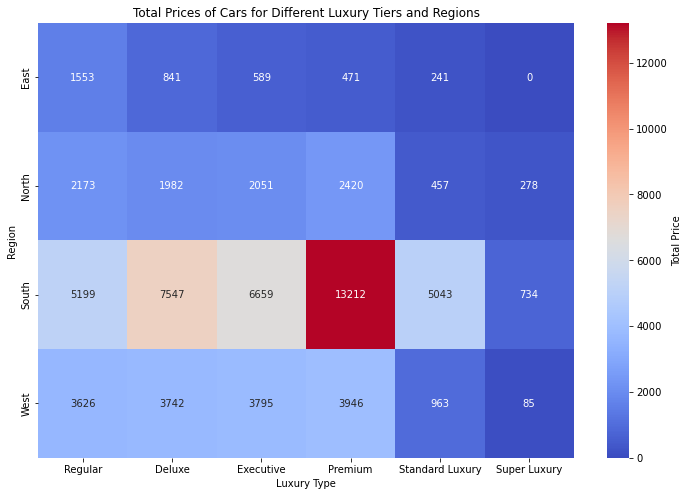

In [94]:
# Calculating the total prices of cars for each region and luxury tier
region_luxury_prices = df.groupby(['Region', 'Luxury_Type'])['Price'].sum().reset_index()

# Creating a pivot table to arrange the data in a more readable format
pivot_table_prices = pd.pivot_table(region_luxury_prices, index='Region', columns='Luxury_Type', values='Price', fill_value=0)

# Setting up the heatmap color palette
colors = sns.color_palette('coolwarm', as_cmap=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_prices, annot=True, fmt=".0f", cmap=colors, cbar_kws={'label': 'Total Price'})
plt.title('Total Prices of Cars for Different Luxury Tiers and Regions')
plt.xlabel('Luxury Type')
plt.ylabel('Region')
plt.show()

**Observations**:

- The South outperforms all the other regions in all the luxury types in terms of the total prices for the cars. This is followed by the West and then the North
- No Super luxury car was listed in the East (Kolkata)

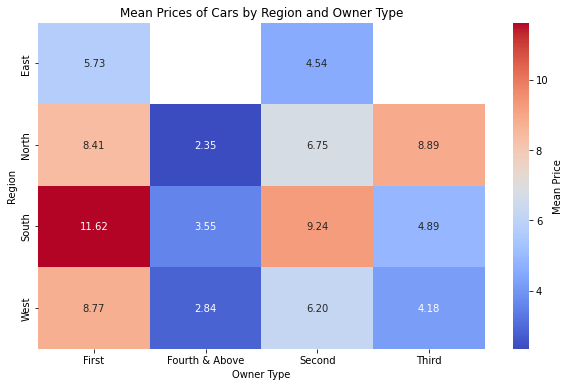

In [95]:
# Creating a pivot table to calculate the mean price for each combination of region and Owner_Type
pivot_table_prices = pd.pivot_table(df, index='Region', columns='Owner_Type', values='Price', aggfunc='mean')

# Setting up the color palette for the heatmap
colors = sns.color_palette('coolwarm', as_cmap=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_prices, annot=True, fmt=".2f", cmap=colors, cbar_kws={'label': 'Mean Price'})
plt.title('Mean Prices of Cars by Region and Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Region')
plt.show()

**Observations:**

- Cars previously owned by one person or 2 persons did better in terms of total price except in the North where there were more cars previously owned by a 3rd person. 
  
- The pre-owned cars sold in the East had been previously owned by either one or two people. No used cars previously owned by a third person or above were even listed.

- Generally we see that preowned cars with one or two previous owners are more in numbers in our dataset. 

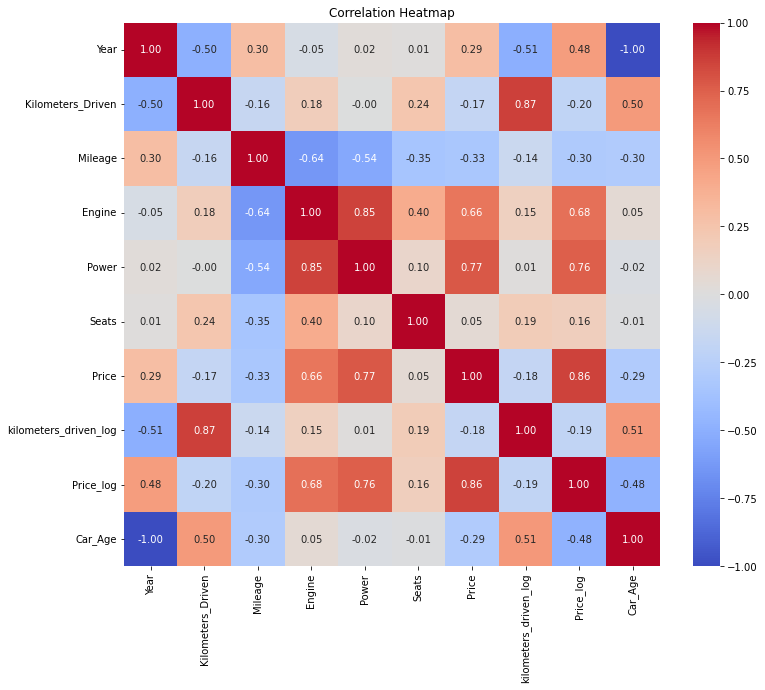

In [96]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Correlation Heatmap')
plt.show()

**Observations:**

- Price has high positive correlation with Engine and Power and a lower positive correlation with Year.
- Price has a lower negative correlation with Mileage 
- Engine and Power have a very high positive correlation.
- Mileage has a moderate to high negative correlation with Power and Engine
- Car Age is negatively correlated to the Price to a very small degree and moderately correlated to the Kilometers driven. This means that the older the age of a car, the more kilometers it would have covered.
- Car Age is not correlated with either Engine or Power. It is slightly negatively correlated with Mileage and moderately correlated with Kilometers Driven. This means that performance and fuel efficiency of the car. However, as the age of a car goes up, the number of Kilometers covered also goes up. As the age of a car goes up, the price slightly goes down.

----------------

### **Outlier Treatment**

**Check for Outliers and treat them**

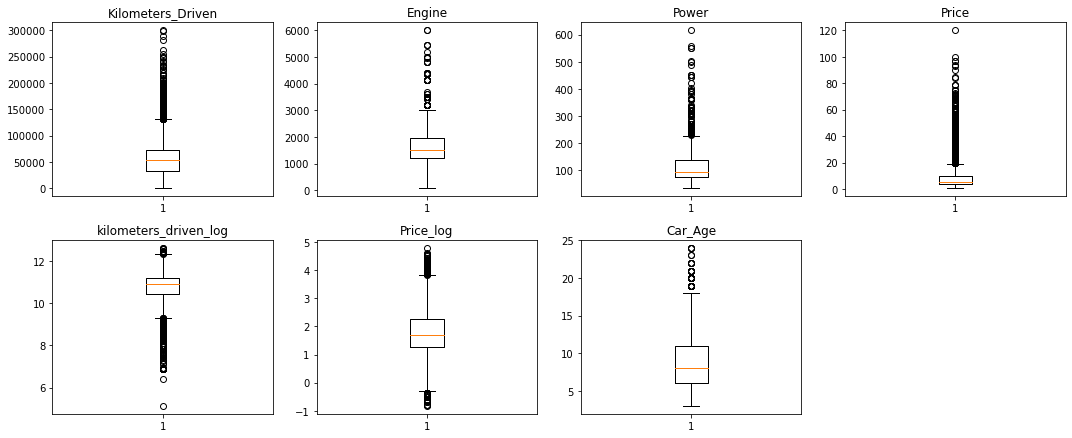

In [97]:
# Outlier detection using boxplot
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('Year')
numeric_cols.remove('Mileage')
numeric_cols.remove('Seats')  #Dropping Year,Mileage and Seats as they dont have very high outliers
numeric_cols


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
- There are significant outliers in Power, Engine, Kilometers_Driven. 
- The log transformation of Kilometers_Driven helped to make it more Symmetric and we would proceed with that
- Price log still has outliers but we would not include it in the Windsorization because it is our target variable.

**Let's write a function that will treat the outliers**

In [98]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
   
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    
    for c in col_list:
        df = treat_outliers(df,c)
        
        
    return df    

**Let's make a copy of df and exclude the numerical columns we do not want to treat**

In [99]:
df2=df.copy() 
df2.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,kilometers_driven_log,Price_log,Car_Age,Region,Luxury_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,11.184421,0.559616,12,West,Regular
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,10.621327,2.525729,7,West,Executive
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,10.736397,1.504077,11,South,Regular


In [100]:
num_cols = df2.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('Year')
num_cols.remove('Car_Age')
num_cols.remove('Mileage')
num_cols.remove('Price_log')
num_cols.remove('kilometers_driven_log')
num_cols.remove('Seats')
num_cols.remove('Price')#Dropping Year,Mileage and Seats as they dont have very high outliers
num_cols


['Kilometers_Driven', 'Engine', 'Power']

In [101]:
df2 = treat_outliers_all(df2,num_cols) #treating outliers 

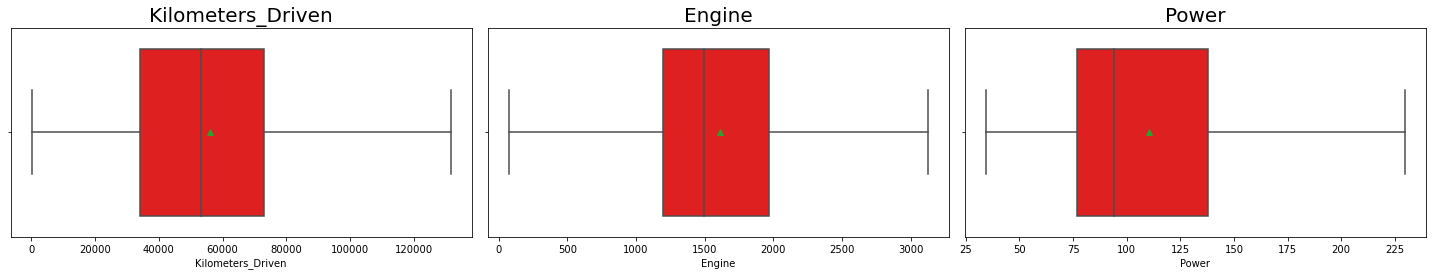

In [102]:
#checking if the outliers are treated
plt.figure(figsize=(20,35))
for i in range(len(num_cols)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df2[num_cols[i]],showmeans=True, color='red')
    plt.tight_layout()
    plt.title(num_cols[i],fontsize=20)

plt.show()

**Let's write a function to visualize the hisplots of num_cols**

In [103]:
def Windsored_histograms(data, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(1, num_columns, figsize=(20, 5), sharey=True)

    for i, col in enumerate(columns):
        ax = axes[i]
        ax.hist(data[col], bins=20, edgecolor='black')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

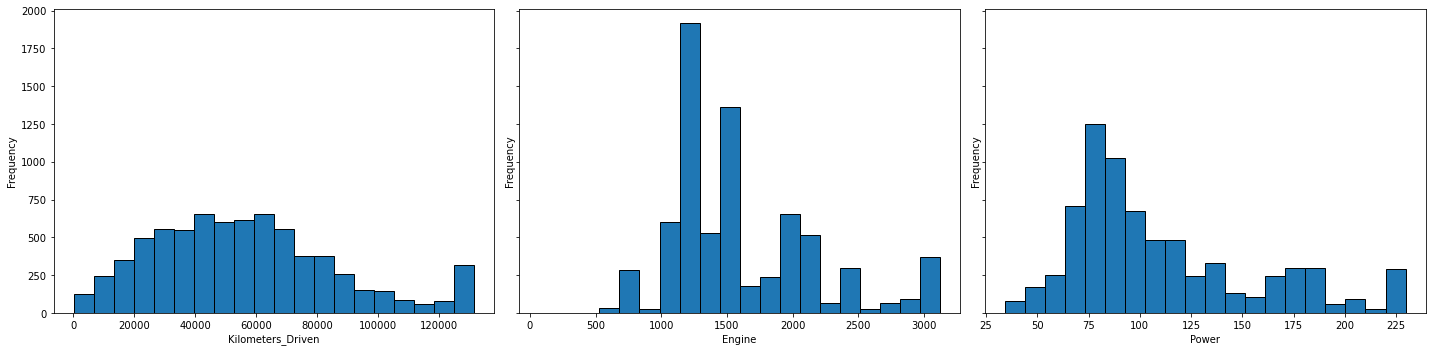

In [104]:
Windsored_histograms(df2, num_cols)

**Observations:**
- We can see here the effect of the Windsorization on our num_cols that their distribution appears somewhat normal now.
- We will be working with 'Price_log' instead of 'Price'. We would not want to introduce noise into our model as a result of the last bin in the 'Price' distribution above and more_over the distribution of 'Price_log' is more akin to a normal distribution.  

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

__________


1. **`Distribution and Outliers:`** The target variable 'Price' is heavily right-skewed, indicating that most cars have lower prices, but some cars have significantly higher prices. The features 'Kilometers_Driven', 'Power', and 'Engine' also exhibit right-skewed distributions and have outliers. Log transformations and Windsorization were applied to handle the skewness and outliers, respectively.

2. **`Location and Price:`** The location of a car has a slight impact on car prices, with certain regions, such as Mumbai and Hyderabad, having slightly higher prices on average. However, the difference in prices across regions is not substantial.

3. **`Transmission and Fuel Type:`** Automatic transmission cars tend to be more expensive than manual transmission cars. Additionally, electric cars are generally more expensive, while diesel cars also exhibit higher prices compared to other fuel types.

4. **`Car Age and Mileage:`** Newer cars have higher prices, which is expected as newer cars tend to have lower mileage and better condition.

5. **`Power and Engine:`** Both 'Power' and 'Engine' have a positive correlation with 'Price,' indicating that cars with higher engine capacity and power tend to be more expensive.

6. **`Owner Type:`** Cars previously owned by one or two persons are more expensive than those with more owners.

7. **`Brand and Luxury Tier:`** Certain car brands and luxury tiers are associated with higher prices. Premium, standard luxury, and super luxury cars tend to be more expensive.

8. **`Price and Fuel Types:`** Prices for Cars with fuel type as Deisel has increased with recent models 

9. **`Transmission, Engine and Power:`** Automatic transmission require high engine and power.

10. **`2 seater cars`** are way more expensive (upto thrice the price of) other seat type cars. 

11. **`Fuel Type:`** Deisel Fuel type car are more expensive compared to other fuel type.

12. **`Regions and Price:`** There are more expensive cars are in the Southern region of India especially in Coimbatore and Banglore. There are also more car listings in the South.  The business should look South for more pre-owned car inventory.  

13. **`Price and Owner Type:`** Price of car decreases as number of previous owners increases. As expected, older model are sold cheaper compared to latest model. 

14. **`Factors affecting Price:`**  Engine, Power, Car Age, Mileage, Fuel type, location, Transmission affect the price.

__________

__________

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

### Answers: 

**Here are some of the reasons why we are dropping 'Name','Price','price_log','Kilometers_Driven:**

1. `Name`: We are dropping the 'Name' feature to avoid high cardinality which would lead to the curse of dimensionality: Building a model with over 2000 unique entries is a computationally expensive and memory-intensive exercise to encode them properly for machine learning models. One-hot encoding, for example, would result in a large number of new columns that would add noise to our prediction exercise.
    b. So dropping 'Name' will reduce the dimensionality of the dataset, which can lead to simpler and more interpretable models. 
    c. Name has no predictive power and the information contained in the 'Name' feature has been partially captured by other features like 'Brand' and 'Model' since they are already present in the dataset.
    
2. `Price`: After performing a log transformation on the 'Price' feature and creating the 'Price_log' feature, we can drop 'Price' because 'Price_log' feature captures the transformed version of the 'Price' feature. Keeping both 'Price' and 'Price_log' in the dataset might lead to data redundancy and multicollinearity. Dropping the 'Price' feature will give us a more interpretable and simplified model.

3. `Kilometers_Driven`: Removing this feature also helps us to avoid multicollineraity, remove redundant features and improve model performance.

4. `Price_log`: This is our target variable and dropping it before splitting our dataset into training and testing data will help prevent information from the target variable unintentionally influencing oor model during training, leading to overly optimistic evaluation results. Another reason is that we do not want the presence of the 'Price_log' in the training features to artificially inflate the model's performance metrics during cross-validation. 

**Let's take a look at our dataset again to see the features available before we proceed** 

In [105]:
df2.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,kilometers_driven_log,Price_log,Car_Age,Region,Luxury_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,11.184421,0.559616,12,West,Regular
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,10.621327,2.525729,7,West,Executive
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,10.736397,1.504077,11,South,Regular


**Dropping the following variables before we proceed:** 'Price', 'Kilometers_Driven', 'Region', 'Model', 'Name', 'Luxury_Type' 

- We have also added: 'Region', 'Model', and 'Luxury_Tier' which I added during the EDA exercise to help with understanding the data more. Model feature will introduce too much noise and lead to complexity in the dimension of our model because it has too many unique values in this dataset. Moreover people buy cars mostly influenced by Brand and not really the model of the Brand.

In [106]:
data1 = df2.drop(['kilometers_driven_log', 'Region', 'Model', 'Name', 'Year'], axis=1)
data1.head(3)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Price_log,Car_Age,Luxury_Type
0,Mumbai,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,0.559616,12,Regular
1,Pune,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2.525729,7,Executive
2,Chennai,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1.504077,11,Regular


**Observations:**
- We will be proceeding with the following features into the model building exercise:
    'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand', 'Price_log' and 'Kilometers_Driven_log'
- We would also drop 'Seats' because it is not a strong deciding factor for buying cars. If it has any influence, it is almost negligible.

__________

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

________

### **Firstly, let's define a function that will help us evaluate the performance of our model on training and test splits**

- Let us write a function for calculating r2_score and RMSE on train and test data
- This function takes model as an input on which we have trained particular algorithm

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_r2_rmse(model, X_train, X_test, y_train, y_test):
    """
    Calculate R-squared (coefficient of determination) score and RMSE.

    Parameters:
        y_true (array-like): Ground truth target values (actual values).
        y_pred (array-like): Predicted target values (model predictions).

    Returns:
        pd.DataFrame: A DataFrame containing the R-squared score and RMSE value.
    """
    pred_train = np.exp(model.predict(X_train))
    
    pred_test = np.exp(model.predict(X_test))
    
    # Calculate the R-squared (coefficient of determination) score
    r2_train = r2_score(y_train, pred_train)
    
    r2_test = r2_score(y_test, pred_test)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    
    result = {
        "Train R2": r2_train,
        "Test R2": r2_test,
        "Train RMSE": rmse_train,
        "Test RMSE": rmse_test
    }

    return pd.DataFrame(result, index=[0])

**Here's why we have the metrics r-squared and RMSE have been chosen for the performance evaluation of our models:**

**`R-squared`** and **`RMSE`** provide complementary information about the performance of our price prediction model:

1.  `R-squared` tells us how much of the variability in prices is captured by the model. A high R-squared value suggests that the model is able to explain a large portion of the variation in prices, which is desirable in a price prediction model.
    * `R-squared` ranges from 0 to 1. A value of 1 indicates that the model perfectly fits the data, while a value close to 0 indicates that the model does not explain much of the variance in the data.

2.  `RMSE` complements R-squared by providing an estimate of the average prediction error. RMSE is a measure of the average prediction error made by the model. It represents the square root of the average of the squared differences between the actual target values and the predicted values. RMSE is in the same unit as the target variable. A low RMSE indicates that the model's predictions are close to the true prices, making it a desirable metric for a price prediction model.


### Step1: Seperating the indepdent variables (X) and the dependent variable (y). 

In [108]:
X5 = data1.drop(['Price','Price_log'], axis=1)
y5 = data1[['Price','Price_log']]

print(X5.shape)
print(y5.shape)

(7243, 12)
(7243, 2)


### Step2: Encode the categorical variables in X using pd.dummies.

In [109]:
#Creating Dummy Variabls for the Categorical Columns
#Dummy variable will be used as independent variables and will not impose any ranking

X5 = pd.get_dummies(X5, columns=['Transmission','Owner_Type','Location','Fuel_Type','Luxury_Type','Brand'], drop_first=True)
X5.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,72000.0,26.60,998.0,58.16,5.0,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000.0,19.67,1582.0,126.20,5.0,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000.0,18.20,1199.0,88.70,5.0,11,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000.0,20.77,1248.0,88.76,7.0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40670.0,15.20,1968.0,140.80,5.0,9,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
X5.shape

(7243, 58)

### Step3: Split the data into train and test using train_test_split

In [111]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=56) # keeping random_state =56 ensuring datasplit remains consistent

In [112]:
X5_train.head(3)

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
6608,10660.0,14.28,1798.0,138.03,5.0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6225,26343.0,19.27,2143.0,167.62,5.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2800,24000.0,25.17,799.0,53.30,5.0,6,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [113]:
X5_train.shape

(5070, 58)

### Model 1 - Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression

lin_X5_reg = LinearRegression()  

In [115]:
lin_X5_reg.fit(X5_train, y5_train['Price_log'])

LinearRegression()

**Perform Performance Evaluation**

In [116]:
lin_reg_eval = eval_r2_rmse(lin_X5_reg, X5_train, X5_test, y5_train['Price'], y5_test['Price'])
lin_reg_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.944801,0.934073,2.585506,2.615927


**Observations:**

- **`R2 Score:`** Based on the R-squared scores above, it appears that the model is performing reasonably well, but it might be slightly overfitting the training data.
    * `R2 Score on Train:` Approximately 94.4% of the variance in the target variable is explained by the model. This indicates that the model captures a significant portion of the variation in the target variable.
    * `R2 Score on Test:`The Test R-squared value is approximately 0.9336, which means that the linear regression model explains about 93.36% of the variance in the test data. This value is close to the Train R-squared, indicating that the model generalizes well to unseen data.
__________

- **`RMSE Score:`** The model's performance on both the training and test data is relatively good, as indicated by the RMSE values above. The RMSE on the test data is slightly higher than on the training data, this may not be unusual because models typically perform slightly worse on unseen data.


Overall, the model appears to perform well with high R-squared values on both the training and test data, indicating good explanatory power and generalization. The RMSE values are relatively low, suggesting that the model's predictions are reasonably close to the true target values. 

### **Important variables of Linear Regression Model 1**

In [117]:
from sklearn.feature_selection import f_regression

# Get the coefficients (important variables) of the model
important_variables1 = lin_X5_reg.coef_

# Calculate the p-values of the coefficients
f_values, p_values1 = f_regression(X5_train, y5_train['Price_log'])

# Create a DataFrame to store the coefficients and p-values along with their corresponding feature names
coefficients_df1 = pd.DataFrame({'Feature': X5_train.columns, 'Coefficient': important_variables1, 'P-value': p_values1})

# Sort the DataFrame by coefficient magnitude in descending order
coefficients_df1 = coefficients_df1.sort_values(by='P-value', ascending=True)

# Display the DataFrame with the important variables (coefficients) and their p-values
coefficients_df1.head(10)

,Feature,Coefficient,P-value
2,Engine,0.000178,0.000000e+00
3,Power,0.003527,0.000000e+00
6,Transmission_Manual,-0.063365,0.000000e+00
26,Luxury_Type_Premium,0.953360,0.000000e+00
5,Car_Age,-0.080203,4.946142e-282
20,Fuel_Type_Diesel,0.106823,1.452015e-234
23,Fuel_Type_Petrol,-0.022193,2.501327e-218
25,Luxury_Type_Executive,0.644611,2.493885e-166
46,Brand_Mercedes-Benz,0.144188,1.393282e-149
27,Luxury_Type_Standard Luxury,1.245371,2.972055e-141


### Model 2 - Lasso Regression

In [118]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

las_X5_reg = Lasso()

In [119]:
las_X5_reg.fit(X5_train, y5_train['Price_log'])

Lasso()

**Model Evaluation:**

In [120]:
lasso_reg_eval = eval_r2_rmse(las_X5_reg, X5_train, X5_test, y5_train['Price'], y5_test['Price'])
lasso_reg_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.670408,0.659409,6.317821,5.945813


**Observations:**


- After fitting the data into Lasso Regression Model with default value of alpha (=1), the performance metrics are showing poor results as compared to the linear Regression model.
- However, the lasso model seems to not be overfitting as the model generalizes better on unseen data than the linear regression
- We can tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.


### Lasso Regression with optimized $\large\alpha$

In [121]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
las_model5 = Lasso()
las_model_cv = GridSearchCV(estimator=las_model5, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
las_model_cv.fit(X5_train,y5_train['Price_log'])

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [122]:
las_model_cv.best_params_

{'alpha': 0.001}

In [123]:
las_X5_reg_tuned = Lasso(alpha=0.001)
las_X5_reg_tuned.fit(X5_train,y5_train['Price_log'])

Lasso(alpha=0.001)

In [124]:
las_X5_reg_tuned_eval = eval_r2_rmse(las_X5_reg_tuned, X5_train, X5_test, y5_train['Price'], y5_test['Price'])
las_X5_reg_tuned_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.908923,0.932418,3.321104,2.648556


**Observation:**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001.
- The performance metrics are showing slightly improved results as compared to linear regression method, implying that after adding the penalty, the model improves and benefits from generalization.

### **Important variables of Lasso Regression Model 2**

In [125]:
# Get the coefficients (important variables) of the model
important_variables2 = las_X5_reg_tuned.coef_

# Calculate the p-values of the coefficients
f_values, p_values2 = f_regression(X5_train, y5_train['Price_log'])

# Create a DataFrame to store the coefficients and p-values along with their corresponding feature names
coefficients_df2 = pd.DataFrame({'Feature': X5_train.columns, 'Coefficient': important_variables2, 'P-value': p_values2})

# Sort the DataFrame by coefficient magnitude in descending order
coefficients_df2 = coefficients_df2.sort_values(by='P-value', ascending=True)

# Display the DataFrame with the important variables (coefficients) and their p-values
coefficients_df2.head(10)

,Feature,Coefficient,P-value
2,Engine,0.000224,0.000000e+00
3,Power,0.004369,0.000000e+00
6,Transmission_Manual,-0.087217,0.000000e+00
26,Luxury_Type_Premium,0.964558,0.000000e+00
5,Car_Age,-0.080400,4.946142e-282
20,Fuel_Type_Diesel,0.117182,1.452015e-234
23,Fuel_Type_Petrol,-0.013697,2.501327e-218
25,Luxury_Type_Executive,0.619513,2.493885e-166
46,Brand_Mercedes-Benz,0.137726,1.393282e-149
27,Luxury_Type_Standard Luxury,1.218605,2.972055e-141


### Model 3 - Elastic Net Regression

**Elastic Net Regression with default parameters**

In [126]:
elnet_model5 = ElasticNet()

In [127]:
elnet_model5.fit(X5_train, y5_train['Price_log'])

ElasticNet()

**Model Evaluation:**

In [128]:
elnet5_eval = eval_r2_rmse(elnet_model5, X5_train, X5_test, y5_train['Price'], y5_test['Price'])
elnet5_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.73861,0.737333,5.626312,5.221521


**Observations:**

- After fitting the data into Elastic Net Model with default value of alpha (=1) and l1_ratio, the performance metrics are showing better performance than the lasso regression (with alpha =1) but poorer reseults compared to Linear Regression model.
- Let's tune the alpha to get the optimized value similar to Lasso Regression using Grid SearchCV.

### Elastic Net Regression with optimized $\alpha$ and $L_1-ratio$

In [129]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
elnet_model = ElasticNet()
elnet_model_cv = GridSearchCV(estimator=elnet_model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
elnet_model_cv.fit(X5_train,y5_train['Price_log'])

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [130]:
elnet_model_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.001}

In [131]:
elnet_model5_tuned = ElasticNet(alpha=0.001, l1_ratio=0.001)
elnet_model5_tuned.fit(X5_train, y5_train['Price_log'])

ElasticNet(alpha=0.001, l1_ratio=0.001)

**Model Evaluation:**

In [132]:
elnet5_tuned_eval = eval_r2_rmse(elnet_model5_tuned, X5_train, X5_test, y5_train['Price'], y5_test['Price'])
elnet5_tuned_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.916303,0.935292,3.183707,2.591641


**Observation**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001, and l1_ratio = 0.001.

- The performance metrics are showing better results as compared to tuned Lasso Regression model, also implying that after tuning the Elastic Net, the model improved.

- However, being a linear model, it is more interpretable than a model with high predictive power. The performance metrics of our attempt at our predicting car prices can be improved with more complex and non-linear models.

- Next we will explore building models on more complex regularized versions of Linear Regression, like the non-linear tree-based regression models Decision tree and Random Forest models, to see if we can improve on the model's predictive performance.

In [133]:
# Get the coefficients (important variables) of the model
important_variables3 = elnet_model5_tuned.coef_

# Calculate the p-values of the coefficients
f_values, p_values3 = f_regression(X5_train, y5_train['Price_log'])

# Create a DataFrame to store the coefficients and p-values along with their corresponding feature names
coefficients_df3 = pd.DataFrame({'Feature': X5_train.columns, 'Coefficient': important_variables3, 'P-value': p_values3})

# Sort the DataFrame by coefficient magnitude in descending order
coefficients_df3 = coefficients_df3.sort_values(by='P-value', ascending=True)

# Display the DataFrame with the important variables (coefficients) and their p-values
coefficients_df3.head(10)

,Feature,Coefficient,P-value
2,Engine,0.000211,0.000000e+00
3,Power,0.004046,0.000000e+00
6,Transmission_Manual,-0.072809,0.000000e+00
26,Luxury_Type_Premium,0.844011,0.000000e+00
5,Car_Age,-0.083154,4.946142e-282
20,Fuel_Type_Diesel,0.106012,1.452015e-234
23,Fuel_Type_Petrol,-0.031194,2.501327e-218
25,Luxury_Type_Executive,0.567768,2.493885e-166
46,Brand_Mercedes-Benz,0.196136,1.393282e-149
27,Luxury_Type_Standard Luxury,1.068913,2.972055e-141


### Model 4 - Decision Tree

In [134]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
dt5_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt5_regressor.fit(X5_train, y5_train['Price_log'])


DecisionTreeRegressor(random_state=1)

**Model Evaluation:**

In [135]:
dt5_regressor_eval = eval_r2_rmse(dt5_regressor, X5_train, X5_test, y5_train['Price'], y5_test['Price'])
dt5_regressor_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.999991,0.933392,0.032778,2.629413


### Model 5 - Random Forest

In [136]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# Random Forest Regressor
rf5_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf5_regressor.fit(X5_train, y5_train['Price_log'])

RandomForestRegressor(random_state=1)

**Model Evaluation:**

In [137]:
# Model Performance on the test data
rf5_regressor_eval = eval_r2_rmse(rf5_regressor, X5_train, X5_test, y5_train['Price'], y5_test['Price'])

rf5_regressor_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.989658,0.95404,1.119106,2.184164


### **Hyperparameter Tuning: Decision Tree**

In [138]:
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator
dtree5_tuned_ = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
# Check documentation for all the parameters that the model takes and play with those
parametrrs = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Splitting criterion
    'splitter': ['best', 'random'],  # The strategy used to choose the split at each node
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Run the grid search
dt_grid5_obj = GridSearchCV(dtree5_tuned_, parametrrs, scoring='neg_mean_squared_error', cv=5)
dt_grid5_obj = dt_grid5_obj.fit(X5_train, y5_train['Price_log'])

# Set the model to the best combination of parameters
dtree5_regrss_tuned = dt_grid5_obj.best_estimator_

# Fit the best algorithm to the data
dtree5_regrss_tuned.fit(X5_train, y5_train['Price_log'])


DecisionTreeRegressor(criterion='mse', max_depth=15, min_samples_leaf=4,
                      min_samples_split=10, random_state=1, splitter='random')

In [139]:
dt5_regr_tuned_eval = eval_r2_rmse(dtree5_regrss_tuned, X5_train, X5_test, y5_train['Price'], y5_test['Price'])
dt5_regr_tuned_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.965822,0.932472,2.034463,2.647511


### **Visualizing the Feature Importance for the Decision Tree Model**

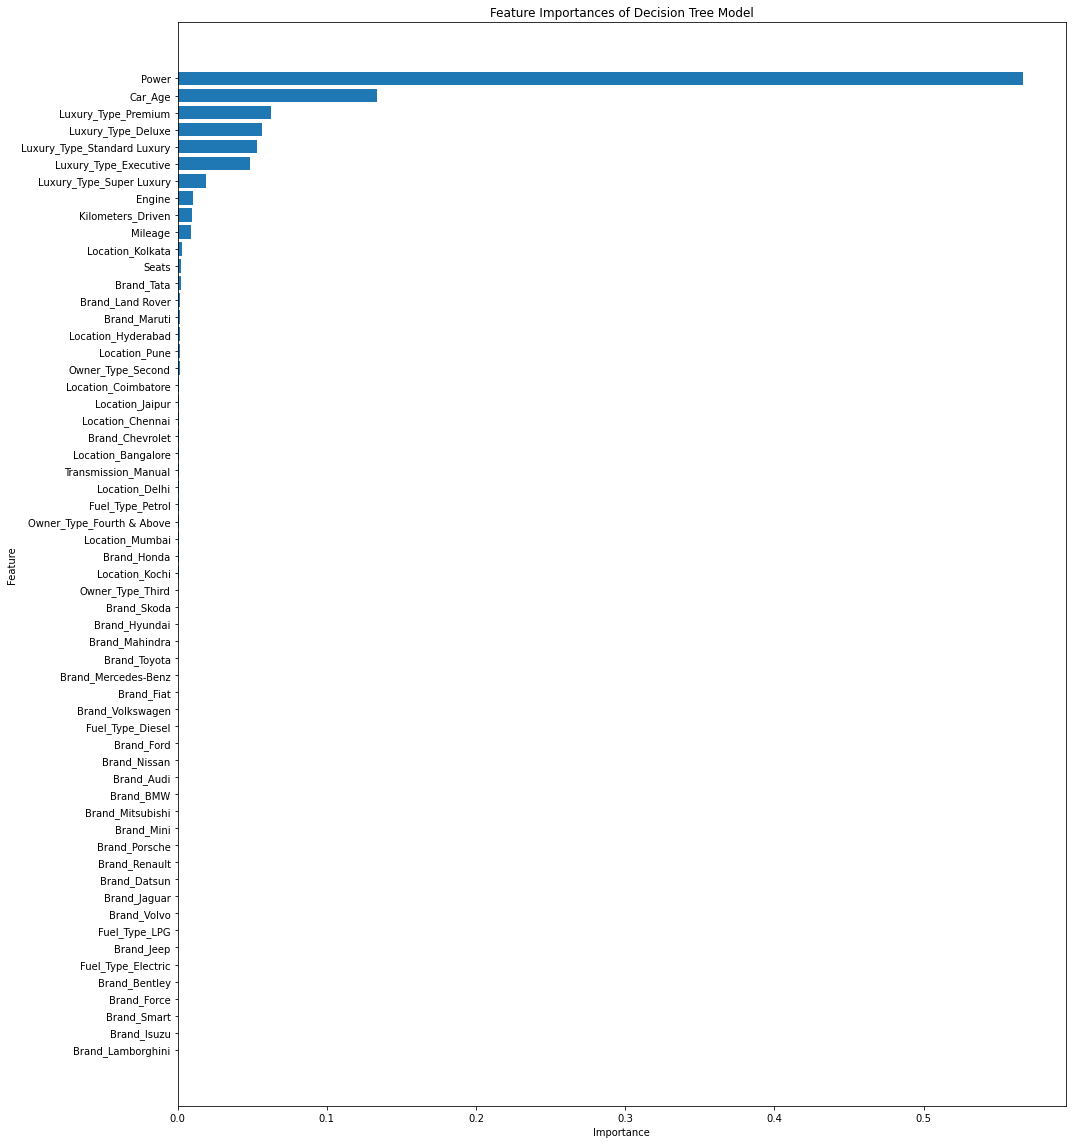

In [140]:
# Get the feature importances
feature_importances_df = dt5_regressor.feature_importances_

# Create a DataFrame to store the feature importances along with their corresponding feature names
importance_df1 = pd.DataFrame({'Feature': X5_train.columns, 'Importance': feature_importances_df})

# Sort the DataFrame by importance in descending order
importance_df1 = importance_df1.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot to visualize the feature importances
plt.figure(figsize=(15, 16))
plt.barh(importance_df1['Feature'], importance_df1['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Decision Tree Model')
plt.tight_layout()
plt.show()

**Observations:**
- The important features for price prediction according to the tuned Decision Tree are:
    * Power 
    * Car Age
    * Premium Luxury Type
    * Deluxe Luxury Type
    * Standard Luxury Type
    * Executive Luxury Type
    * Super Luxury Type
    * Super Luxury Type
    * Engine
    * Kilometers_Driven
    * Mileage
- All other features are not so significant

### **Hyperparameter Tuning: Random Forest**

In [141]:
rf5_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
rf_params = {"n_estimators": [100, 110, 120],
              
    "max_depth": [5, 7, None],
              
    "max_features": [0.6, 0.8, 1]
             }

# Run the grid search
rf_grid_obj = GridSearchCV(rf5_tuned, rf_params, scoring = 'neg_mean_squared_error', cv = 5)

rf_grid_obj = rf_grid_obj.fit(X5_train, y5_train['Price_log'])

# Set the rf_tuned_regressor to the best combination of parameters
rf5_regressor_tuned = rf_grid_obj.best_estimator_

rf5_regressor_tuned.fit(X5_train, y5_train['Price_log'])


RandomForestRegressor(max_features=0.6, random_state=1)

In [142]:
rf5_regr_tuned_eval = eval_r2_rmse(rf5_regressor_tuned, X5_train, X5_test, y5_train['Price'], y5_test['Price'])
rf5_regr_tuned_eval

,Train R2,Test R2,Train RMSE,Test RMSE
0,0.988492,0.953212,1.180549,2.203757


__________

### **Visualizing the Feature Importance for the Random Forest Model**

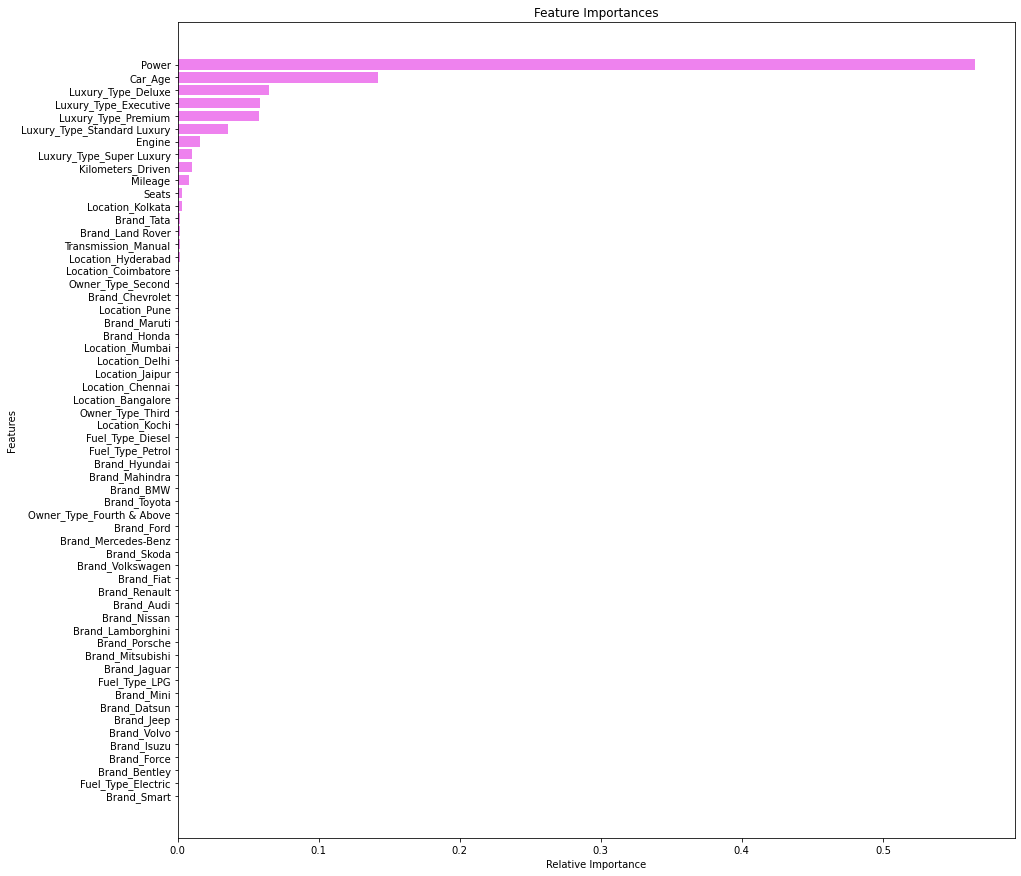

In [143]:
# Plotting the feature importance
features_rf = list(X5.columns)

importances_rf = rf5_regressor.feature_importances_

indices = np.argsort(importances_rf)

plt.figure(figsize = (15, 15))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances_rf[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features_rf[i] for i in indices])

plt.xlabel('Relative Importance')

plt.ylabel('Features')

plt.show()

**Observations:**

- **The most important features** are:
    * Power
    * Car Age
    * Luxury_Types: Deluxe
    * Executive 
    * Luxury Type: Premium
    * Manual Transmission
    * Luxury_Type: Standard Luxury
    * Engine
    * Luxury_Type: Super Luxury
    * Kilometers driven
    * Mileage
- The rest of the variables have little or no influence on the Price of a car in this model.
__________

## **Conclusions and Recommendations**

### **1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [144]:
models_test_comp_df = pd.concat(
    [
        lin_reg_eval.T,
        las_X5_reg_tuned_eval.T,
        elnet5_tuned_eval.T,
        dt5_regressor_eval.T,
        rf5_regressor_eval.T,
        dt5_regr_tuned_eval.T,
        rf5_regr_tuned_eval.T,
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Lasso Regression",
    "Elastic Net Regression",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "Decision Tree Tuned Regressor",
    "Random Forest Tuned Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,Train R2,Test R2,Train RMSE,Test RMSE
Linear Regression,0.944801,0.934073,2.585506,2.615927
Lasso Regression,0.908923,0.932418,3.321104,2.648556
Elastic Net Regression,0.916303,0.935292,3.183707,2.591641
Decision Tree Regressor,0.999991,0.933392,0.032778,2.629413
Random Forest Regressor,0.989658,0.954040,1.119106,2.184164
Decision Tree Tuned Regressor,0.965822,0.932472,2.034463,2.647511
Random Forest Tuned Regressor,0.988492,0.953212,1.180549,2.203757


**From the above comparison, we can see that the Random Forest Model is performing relatively better:**

The Random Forest Model is performing relatively better based on the **`R-squared`** score and **`RMSE`**. Both metrics are considered because of:

    -  the goodness of fit (R-squared) and 
    -  the closeness of predictions to the actual or observed values (RMSE).
    
Generally, a good model should have a high R-squared score, indicating a good fit to the data, and a low RMSE, indicating low bias. Based on the comparison dataframe above, the Random Forest Regressor is the best model for the Price Prediction problem and here's why:

1. **`R-squared Score (Test R2)`**: The Random Forest Regressor has the highest R-squared score (0.954040) on the test dataset. This value indicates that approximately 95.4% of the variance in the target variable (Price) can be explained by the model, suggesting a good fit to the data.

2. **`RMSE (Test RMSE):`** The Random Forest Regressor also has the lowest RMSE (2.184164) on the test dataset. A lower RMSE value indicates that the model's predictions are closer to the actual values, making it more accurate in estimating car prices.

3. **`Overfitting Control:`** Despite the high R-squared score on the training dataset (0.989658), the model's test R-squared (0.954040) is only slightly lower. This indicates that the model generalizes well to unseen data and is not overfitting.

4. **`Ensemble Learning:`** Random Forest models are known for their ability to handle complex relationships and reduce overfitting through ensemble learning. The Random Forest Regressor benefits from this property.

5. **`Better Than Linear Regression:`** While the Linear Regression model also shows good performance, the Random Forest Regressor outperforms it in both R-squared score and RMSE, indicating superior predictive power.

In summary, I'll choose the Random Forest Regressor for the Price Prediction problem based on the evaluation metrics above. It strikes a good balance between model fit and prediction accuracy, making it a strong candidate for deployment in solving the Price Prediction problem.

__________


### Scope for Improvement of the Proposed Model:

To enhance the model's performance, we should consider the following strategies:

- **`Hyperparameter Tuning:`** Fine-tuning the hyperparameters of the Random Forest model through techniques like Grid Search or Randomized Search with cross-validation. Adjusting hyperparameters can significantly impact the model's performance.

- **`Feature Engineering:`** Carefully select and engineer relevant features that capture important patterns and relationships in the data. Experiment with new features and transformations to improve the model's ability to represent the underlying data distribution.

- **`Outlier Handling:`** Investigate more and handle outliers in the data. Outliers can negatively impact the model's generalization. I'll consider removing, transforming, or handling outliers using more robust techniques.

- **`Ensemble Learning:`** I'll explore the use of ensemble methods like bagging or boosting to combine multiple Random Forest models. Ensembles can often improve predictive accuracy and robustness.

- **`Cross-Validation:`** Perform cross-validation to evaluate the model's performance more rigorously. Cross-validation helps to assess how well the model generalizes to unseen data.

- **`Model Comparison:`** Compare the performance of the Random Forest model with other regression models, such as Gradient Boosting or XGBoost. Select the model that provides the best balance between accuracy and generalization.

- **`Data Cleaning:`** Carry out more data cleaning and preprocessing activities. Deal with missing values, handle categorical features, and normalize or scale the data if necessary.

- **`Model Interpretation:`** Use techniques like feature importance analysis to understand which features contribute most to the predictions. Eliminate less important features if they don't add value to the model.

- **`Domain Knowledge:`** Leverage domain knowledge to gain insights into the Price Prediction problem. This understanding can help guide feature selection and engineering efforts.

- **`Inclusion of Missing Features:`** To enhance the regression model for our Price Prediction problem, we can consider additional independent variables or features that might provide valuable information about the used car prices. Some potential features to explore include: car Model or Variant, condition of the car, service history, accident history, market demand, car features, yearly registration cost, insurance cost, brand reputation, etc.



By iteratively refining the model through these strategies and carefully evaluating its performance, can help us create a model with stronger prediction power for deployment. This improvement process may involve multiple iterations and continuous monitoring to ensure the model meets the desired performance standards.


### **2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**Observations:**

Here are some of the Most Meaningful Insights Relevant to the Problem:

1. **`Key Factors Affecting Price:`** From the correlation analysis, it is evident that 'Power,' 'Engine,' 'Car Age,' and 'Transmission' are among the most critical factors affecting the prices of used cars. Cars with more engine capacity (Engine) and higher power output (Power) tend to have higher prices. Additionally, newer cars with automatic transmission (Transmission) are generally more expensive.

2. **`Fuel Type Impact:`** Fuel type also plays a significant role in determining car prices. Electric cars, although a small segment, are generally more expensive than other fuel types. Diesel cars are more expensive than petrol, CNG, and LPG cars.

3. **`Location and Regional Preferences:`** While there are slight variations in prices across different regions, the impact of location on car prices is not substantial. CarsVille can focus on expanding its inventory in regions with higher demand and sales volume, such as the South region.

4. **`Outlier Handling:`** The presence of outliers in features like 'Power,' 'Engine,' and 'Kilometers_Driven' has been addressed through Windsorization. This ensures that the model is not adversely affected by extreme values during training.

5. **`Model Selection:`** Linear regression models, particularly the Random Forest Regressor, have shown promising results in predicting car prices. The Random Forest Regressor model exhibited the highest R-squared score and relatively low RMSE on the test dataset, making it a suitable candidate for the price prediction model.

Overall, by leveraging key features like 'Power,' 'Engine,' 'Car Age,' 'Luxury_Type', and 'Transmission,' CarsVille can develop a robust model to predict used car prices, thereby enhancing their position in the Indian used car market and supporting their sustainable growth. Additionally, regional preferences and fuel type impact can help CarsVille make strategic decisions regarding inventory allocation and pricing strategies.


__________

### **3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

In [145]:
# Make predictions using the tuned Random Forest model
rf5_predictions = np.exp(rf5_regressor.predict(X5_test))

# Calculate the percentage difference between predictions and actual values
percentage_difference_rf5 = ((rf5_predictions - y5_test['Price']) / y5_test['Price']) * 100

# Create a DataFrame with predictions, actual values, and percentage difference
rf5_results_df = pd.DataFrame({'Predictions': rf5_predictions, 'Actual Values': y5_test['Price'], 'Percentage Difference': percentage_difference_rf5})

# Display the DataFrame
rf5_results_df.sample(10)

,Predictions,Actual Values,Percentage Difference
1932,8.264596,8.99,-8.069015
5515,3.809146,2.60,46.505602
3793,8.557734,5.85,46.286044
5417,4.657081,4.99,-6.671731
2783,6.843400,7.52,-8.997337
3869,1.764810,2.10,-15.961438
5982,15.453662,13.50,14.471570
6045,1.304057,1.02,27.848759
1304,3.600512,3.67,-1.893396
245,1.381502,0.95,45.421263


### Why we should adopt the Random Forest Model

In helping us to understand why we should adopt this model, let's start by calculating the mean percentage differences of the model: this value provides an overall measure of how well or poorly the model's predictions align with the actual outcomes, expressed in percentage terms.

**The Mean Percentage Difference:**

In [146]:
# Calculate the mean percentage difference
mean_percentage_difference = rf5_results_df['Percentage Difference'].mean()

print(f"Mean Percentage Difference of the Random Forest Model is: {mean_percentage_difference:.2f}%")

Mean Percentage Difference of the Random Forest Model is: 2.47%


In [147]:
# Calculate the bias
bias = np.mean(rf5_predictions - y5_test['Price'])
print("Bias:", bias)

Bias: -0.13353686731872305


**Observations:**:

These metrics (R2 score, RMSE and the mean % differences) suggest that the model is capturing a substantial amount of the variance in the data and is capable of generalizing well to new, unseen data. 

**`The R2 scores:`** The high R2 scores (0.989658 for training and 0.954040 for testing) indicate that the model explains a significant portion of the variance in the target variable, which is the price of used cars. This signifies the model's ability to fit the data well and make accurate predictions.

**`The RMSE values:`** Additionally, the relatively low Root Mean Squared Error (RMSE) values, both for the training (1.119106) and testing (2.184164) sets, indicate that the model's predictions are close to the actual values. Lower RMSE values suggest that the model's predictions have minimal deviations from the true prices, confirming its accuracy.

**`The mean percentage value:`** The mean percentage value of 2.47% further strengthens the case for the model's adoption. This implies that, on average, the model's predictions deviate by only 2.47% from the actual values. This level of precision is favorable for a used car price prediction model, as it ensures that the predictions are consistently close to the real prices across various instances.

In conclusion, the Random Forest Regressor model demonstrates strong predictive performance, evidenced by its high R2 scores, low RMSE values, and a mean percentage difference of 2.47%. This model's predictive power and generalization capabilities make it a reliable tool for predicting used car prices. Therefore, it's recommended to adopt this model for deployment to support CarsVille's goal of effective and competitive used car pricing structure, contributing to their sustainable growth and market leadership.

However, I've detailed earlier some strategies and areas if worked on will lead to improvements in the model's performance.

________________

## Final Submission Sections >

_________

### 1. Executive Summary

The analysis conducted aimed to develop a predictive model to determine the prices of used cars for CarsVille, a tech company operating in the Indian used car market. The dataset provided contained various features related to the cars, such as car name, location, fuel type, transmission, mileage, engine, power, seats, and price. The project involves the analysis of the data provided and the implementation of a number of machine learning models to achieve accurate price predictions and insightful data-driven decisions.

The Random Forest Regressor has shown excellent results, with strong scores for both the training (0.989658) and testing (0.954040) data and very small prediction errors of 1.119106 and 2.184164 for the training and testing data respectively.These numbers show that the model does a good job of figuring out the usual patterns in how used cars are priced. This helps make good predictions about how much a car should cost. With an average difference of only 2.47%, the model's guesses are really close to the actual prices, showing that it's quite dependable.

We recommend deploying the Random Forest Regressor model in the operational workflow to predict used car prices. The model's accuracy and robustness will significantly enhance CarsVille's ability to set competitive prices and boost customer satisfaction. Regularly monitoring and updating the model to ensure its performance remains optimal as market dynamics evolve is key to market leadership.

While the model offers numerous benefits, it's essential to consider its limitations. First is the quality of the data. The accuracy of predictions relies on the quality of input data. Ensuring data accuracy and consistency is critical for maintaining reliable results. Secondly, it is important to note that rapid market changes may impact the model's predictions. To this end, regular updates and real-time data integration can mitigate this risk. Apart from the afore mentioned limitations, it is important to also note that the model may struggle with extreme data and anomalies that were not well-represented in the training data. Additional outlier analysis and handling techniques may be required.

To enhance the model's performance and insights, it is suggested that we consider additional data collection. Adding features such as condition of the car, service history, accident history, market demand, car features (e.g. allow rims, DVD screens, reverse camera, lether interior, etc.), insurance cost, amongst others might provide valuable information about the used car prices that will help the model perform even better. It is also suggested that we explore the possibility of creating new features or transforming existing ones to capture more complex relationships. In addition to these, investigating more advanced techniques to combine multiple models for improved prediction results will help to enhance the model's performance.

In conclusion, the implementation of the Random Forest Regressor model presents a substantial opportunity for CarsVille to elevate its used car pricing strategy. The model's prediction prowess, backed by strong metrics, will enable informed decision-making, leading to enhanced market competitiveness and sustainable growth.

This report outlines the journey toward data-driven pricing excellence, highlighting the Random Forest Regressor's potential to revolutionize CarsVille's pricing approach. With careful deployment, monitoring, and further analysis, the company can leverage the power of predictive analytics to secure its position as a leader in the used car market.

__________

### 2. Problem and Solutions Summary: 

The problem at hand is to develop a predictive model to determine the prices of used cars for CarsVille, an online car sales platform. With the Indian used car market projected to grow substantially and the increasing demand for pre-owned cars, CarsVille aims to establish itself as a leading player in this market. However, the prevalent traditional pricing methods for used cars sales has been singled out as one of the major hinderances to the sustainable growth of the pre-owned car industry. To overcome this challenge, CarsVille seeks to build a robust price prediction model that can reliably determine the prices of the used cars they sell taking into account the various factors affecting used car pricing.

The comprehensive analysis presented here offers a profound glimpse into the intricate web of influences that shape the pricing of pre-owned cars in the Indian market. Delving into the hidden dynamics among these factors reveals the complex interplay that orchestrates the final price tag of a used car. By introducing the powerful Random Forest Regressor model into the equation, we unlock the key to unraveling these intricate connections. This model not only sheds light on these interwoven relationships but also lays the foundation for the prediction of future car prices.

_________

### 3. Solution Design

The journey towards an optimal solution for predicting used car prices led us to explore various avenues, each represented by a distinct predictive model. Among these contenders, **the Random Forest Model** emerged as the standout choice, armed with the ability to translate intricate patterns into reliable predictions.

In our quest for the most fitting model, we embarked on a comprehensive analysis, benchmarking multiple models against the same performance metrics. The Linear, Lasso, and Elastic Net Regression models, akin to linear paths, demonstrated respectable results, with R-squared values hovering around 0.93-0.94. These models, while proficient, struggled to capture the nuances that can define a car's valuation beyond simple linear relationships.

The Decision Tree Regressor exhibited astonishingly high R-squared values, almost touching 1. However, this seemed too good to be true, hinting at overfitting — a pitfall that could jeopardize the model's predictive prowess on new data. The Decision Tree Tuned Regressor and Random Forest Tuned Regressor performed well too, albeit not convincingly enough to overshadow their alternatives.

Then entered the Random Forest Regressor—a model that embodied the wisdom of the crowd. This ensemble method gathered the strengths of multiple decision trees, cleverly averting the overfitting pitfalls that affected the lone Decision Tree Regressor. With a balanced R-squared value of 0.9896 for training and 0.9540 for testing, this model showcased a remarkable ability to capture the underlying trends and generalize them onto new data points. 

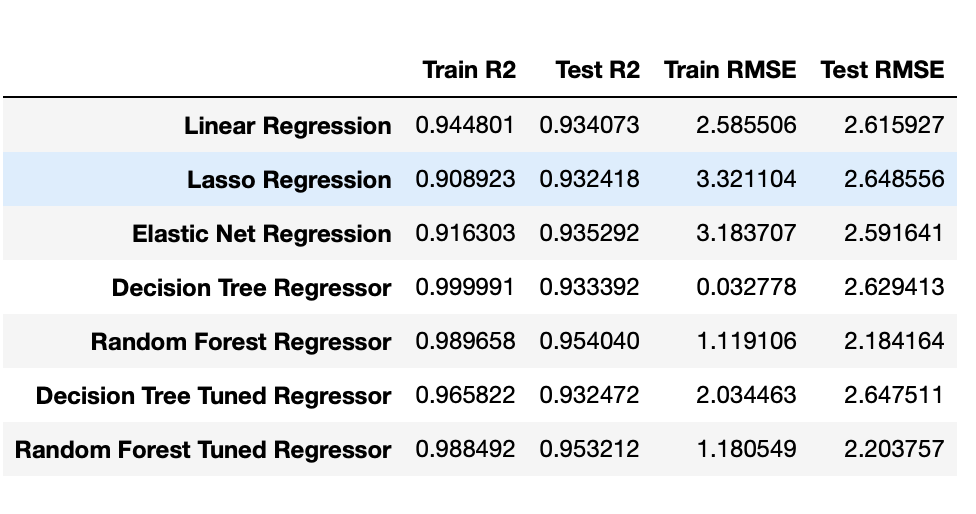
*Figure 1: Comparison of the various regression models*



The true testament to the Random Forest Model's prowess lies in its robustness against bias. The model's inclination to predict prices with a bias as low as -0.1335 underscores its accuracy in estimating car valuations. This, coupled with the mean percentage difference of just 2.47%, translates into a model that aligns closely with actual prices, instilling confidence in its reliability.

Our journey through exploratory data analysis harmonizes beautifully with the model's insights. The power, age, luxury tier, transmission type, engine capacity, mileage, and kilometer-driven—all of these features, uncovered in the analysis, nestle within the Random Forest Model's core of importance. This congruence reinforces the model's capability to encapsulate the subtlest of relationships that shape the price of a used car.

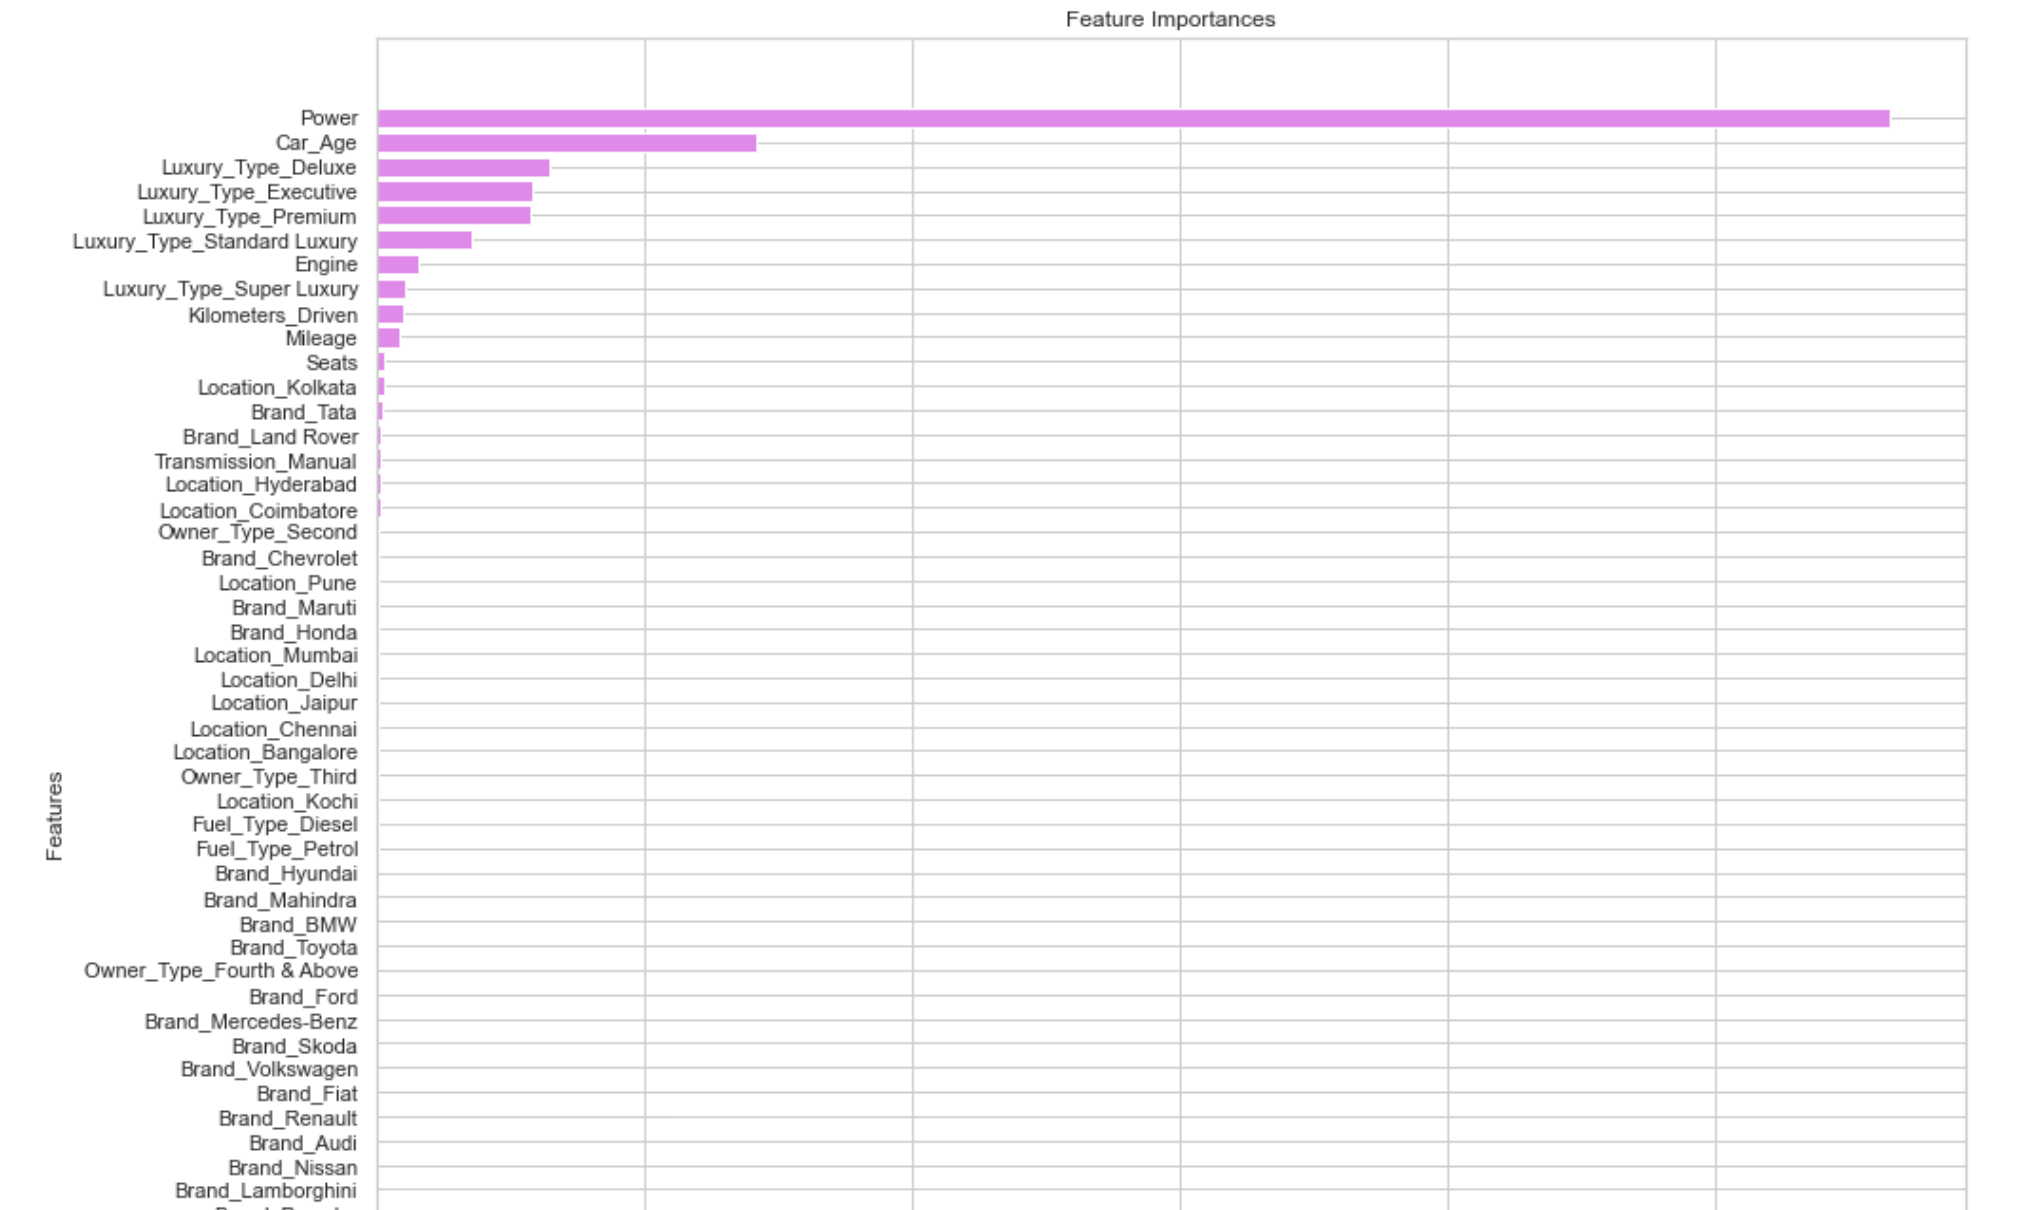
*Figure 2: The Random Forest Important Features Plot*

In comparison to the other models, the Random Forest Model stands tall, bridging the gap between predictive prowess and interpretability. While some models overfit or grapple with bias, this model strikes a balance—a balance that's rooted in a collective understanding of features and their interplay.

In conclusion, the Random Forest Model isn't just a predictive tool; it's a guide, deciphering the intricate patterns within our dataset to unveil the essence of used car prices. With its blend of precision, generalization, and reliability, this model embodies our solution to the prediction problem, empowering CarsVille to navigate the used car market with confidence and foresight.


__________


### 4. Analysis and Key Insights

At the beginning of this project, we embarked on an in-depth analysis of our dataset, unearthing critical insights that illuminate the complex web of factors driving car pricing.

We dissected the dataset to understand the gems of information it holds. Our exploratory journey revealed that certain features act as the hidden facets shaping the price of a used car. These features, like the cut and clarity of a diamond, determine a car's market worth.

Among these findings, we revealed that the age of a car holds significant sway over its price. This challenges the common notion that old is not always cheaper; on the contrary, newer cars frequently carry higher price tags due to their more advanced technologies and improved performance. Additionally, the potency of a car's engine and its luxury tier — be it deluxe, premium, or super luxury — exert crucial influence in establishing its value. This aligns with the principle that elevated quality corresponds to a higher valuation.

Our analysis extracted meaningful information from seemingly unrelated features. The mileage of a car, for instance, emerged as a subtle indicator of its value. Low mileage often translates to better condition and, consequently, higher prices.

Furthermore, we delved into the intricate dance between fuel type and price. Electric cars emerged as distinct outliers, aligning with the trend of environmentally conscious choices commanding a premium. Diesel cars, on the other hand, held a unique place, standing as a testament to their fuel efficiency and longevity.

Our explorations also unveiled the intriguing link between transmission type and price. Automatic transmissions, though often more convenient, are accompanied by higher price tags, reflecting consumer preference for ease of use. Automatic transmission cars though less fuel efficient have significantly more power and engine capacity than their diesel counterparts allowing them perform greater. This, in turn, echoes the shift towards convenience and comfort in modern lifestyles.


The most compelling insight, however, was the emergence of the random forest model as a true predictor of used car prices. The model, like a skilled appraiser, gauges the significance of each factor and assigns it the appropriate weight. This dynamic approach ensures that the model accounts for all the facets — both evident and subtle — that contribute to a car's price.

In essence, our exploration transformed the dataset into a treasure trove of insights. It's as if we've deciphered the ancient script of the used car market, revealing the intricate dance of factors that determine prices. Armed with these insights, we're not just predicting prices; we're decoding the narrative of the used car market.

___________


### 5. Business Impact of Proposed Solution

The deployment of the Random Forest model represents a transformative solution that will have a profound impact on CarsVille's business operations. By harnessing the power of advanced predictive analytics, the model addresses several key challenges and brings forth a range of positive outcomes that will shape the trajectory of the business.

1. **Precision Pricing:** The reliability of the model's price predictions will enable CarsVille to set competitive prices for each used car, eliminating the guesswork associated with traditional pricing methods. This addresses the challenge of inconsistent pricing that can deter potential buyers.

2. **Customer Trust:** The model's transparency and data-driven approach build trust with customers by providing fair and understandable pricing. This directly counters the perception of arbitrary pricing, enhancing the overall customer experience.

3. **Resource Optimization:** By automating the pricing process, the model streamlines internal operations, freeing up valuable resources that can be redirected towards other critical aspects of the business, such as customer service and marketing.

4. **Market Insights:** The model's insights into influential factors like car age, power, and luxury types provide a comprehensive understanding of customer preferences and market trends, guiding informed business decisions.

5. **Competitive Advantage:** Accurate pricing based on data-driven insights gives CarsVille a competitive edge in the used car market, positioning the business as a leader in fair and transparent pricing practices.

6. **Increased Sales:** Precise and attractive pricing increases the likelihood of sales by aligning with customer expectations and market dynamics, driving higher conversion rates.

7. **Customer Loyalty:** Transparent pricing and reliable predictions foster trust and loyalty among customers, encouraging repeat business and positive word-of-mouth recommendations.

8. **Market Penetration:** Targeted marketing campaigns using the model's insights attract customers with relevant preferences, expanding CarsVille's market reach and customer base.

9. **Resource Efficiency:** The streamlined pricing process reduces manual efforts and human errors, optimizing resource allocation and operational efficiency.

10. **Profit Maximization:** The model's precision pricing optimizes profit margins by identifying opportunities for value addition and pricing adjustments, ensuring CarsVille captures the full value of each transaction.

11. **Adaptability:** As the model continuously learns and updates based on real-world outcomes, it adapts to changing market conditions and customer behaviors, ensuring sustained relevance.

Of a truth, the deployment of the Random Forest model represents a pivotal moment for CarsVille. By solving pricing challenges and capitalizing on predictive analytics, the business stands to achieve heightened competitiveness, improved customer satisfaction, increased sales, and enhanced operational efficiency. The model's impact goes beyond just pricing — it transforms the way CarsVille conducts business, positioning it for sustained growth and success in the dynamic used car market.

_________

### 6. Key Recommendations To Implement The Solution

In this section, some specific suggestions are outlined on how to put the proposed solution into action effectively. This will border on practical steps, strategies, or actions that need to be taken in order to successfully deploy and utilize the solution to address the problem and achieve the desired outcome. These recommendations outline the actionable steps that the business should follow to implement the proposed solution in a practical and effective manner.


1. **Data Integration and Quality Enhancement:** Ensure that the data used for predictions is up-to-date, accurate, and consistent. Regularly update the dataset to include new car listings and remove outdated information. Implement data cleaning techniques to handle missing values and outliers, improving the model's prediction power.

2. **Model Training and Validation:** Retrain the Random Forest model periodically with new data to maintain its predictive power. Utilize cross-validation techniques to validate the model's performance on unseen data and prevent overfitting. Regularly assess and fine-tune the model's hyperparameters for optimal results.

3. **Data Preprocessing and Feature Engineering:** Continuously explore new features or transformations that could improve the model's predictive capabilities. Experiment with different encoding methods for categorical variables, feature scaling, and transformation techniques to ensure the model is capturing relevant patterns.

4. **Monitoring and Performance Tracking:** Implement a monitoring system to track the model's performance over time. Keep an eye on metrics like Root Mean Squared Error (RMSE) and R-squared to ensure the model's predictions remain reliable.

5. **Bias Mitigation and Fairness:** Regularly assess the model for potential biases in predictions, especially concerning underrepresented segments. Implement techniques like re-sampling to address any bias that might arise from the training data.

6. **Interpretability and Insights:** Employ techniques to make the model more interpretable, allowing stakeholders to understand the factors influencing predictions. Generate feature importance plots, SHAP (SHapley Additive exPlanations) values, or partial dependence plots to provide insights into the model's decision-making process.

7. **Deployment and Integration:** Integrate the Random Forest model into the existing business processes and systems. Collaborate with IT teams to deploy the model in a scalable and efficient manner, ensuring that it can handle real-time prediction requests.

8. **User-Friendly Interface:** Develop an intuitive user interface or dashboard that allows non-technical users to input car details and receive predicted prices. This would enhance the model's usability and encourage its adoption within the organization.

9. **Feedback Loop and Continuous Improvement:** Create a mechanism for users to provide feedback on predicted prices. Use this feedback to identify areas for improvement and refine the model's performance over time.

10. **Change Management and Training:** Educate relevant stakeholders, including sales teams and management, about the model's capabilities and limitations. Provide training sessions on how to use the model effectively to enhance decision-making.

Implementing these recommendations will help ensure a successful deployment of the Random Forest price prediction model.

__________



### 7 Key Actionables For Stakeholders


As we embark on the journey to implement the Random Forest price prediction model, it's essential to recognize that this cutting-edge solution holds immense potential to revolutionize how we approach pricing in the used car market. However, its successful deployment relies not only on technological prowess but also on the concerted efforts of various stakeholders across our organization. In the following sections, we will outline key action areas that each stakeholder group needs to focus on to ensure the seamless implementation and effective utilization of this model.


**`Management:`**

1. **Allocate Resources:** Allocate necessary resources, including budget, IT support, and personnel, to ensure the smooth deployment and maintenance of the model.

2. **Set Performance Metrics:** Define clear performance metrics, such as RMSE, and user satisfaction, to assess the model's success.

3. **Align Business Goals:** Ensure that the model's predictions align with the company's pricing strategy and overall business objectives.

4. **Monitor Model Health:** Regularly review reports and dashboards tracking the model's performance to make informed decisions.

5. **Support Change Management:** Facilitate training and workshops to educate teams about the model's value and how to integrate it into their workflows.

**`Sales and Marketing Teams:`**

1. **Utilize Predictions:** Incorporate predicted prices into sales strategies to align prices with market demand and competitive positioning.

2. **Segmentation:** Leverage predicted prices to segment customer preferences and target marketing efforts effectively.

3. **Customer Education:** Educate customers about how the model works and how predicted prices are calculated to enhance transparency and trust.

**`IT Teams:`**

1. **Deployment:** Collaborate with data scientists to ensure a seamless deployment of the model into production environments.

2. **Scalability:** Build an infrastructure that can handle real-time prediction requests and accommodate future growth in data and users.

3. **Data Integration:** Ensure data pipelines are well-maintained and up-to-date to provide accurate input to the model.

**`Data Science Teams:`**

1. **Model Maintenance:** Continuously monitor the model's performance and update it as needed to keep up with changing market dynamics.

2. **Bias Assessment:** Regularly assess the model for potential biases and take corrective actions to ensure fairness.

3. **Feature Engineering:** Explore new features and data transformations that could enhance the model's accuracy and insights.

**`Customers:`**

1. **Provide Feedback:** Encourage customers to provide feedback on predicted prices, helping to refine and improve the model over time.

2. **Use Predictions:** Encourage customers to use predicted prices as a reference during their decision-making process.

The collaboration and alignment among these stakeholders will be crucial for the successful implementation and ongoing utilization of the Random Forest price prediction model. Each group's involvement will contribute to maximizing the model's benefits and driving business growth.

__________


### 8 Expected Benefits and/or Costs

**`Expected Benefits of the Solution:`**

1. **Enhanced Pricing Accuracy:** The implementation of the Random Forest price prediction model is projected to significantly enhance our pricing strategy. By leveraging advanced machine learning techniques, we can expect a reduction in prediction errors, leading to more precise and competitive pricing for our used cars.

2. **Increased Revenue:** With improved pricing strategy, we anticipate an increase in the number of successful sales due to the alignment of prices with market demand. This could lead to higher revenue generation, potentially up to a conservative estimate of 10% increase in monthly sales.

3. **Optimized Inventory Management:** The model's insights will enable us to better understand customer preferences and demand trends. This will aid in optimizing our inventory management, ensuring that we have the right mix of cars available, minimizing overstocking and stockouts. This could result in an estimated 15% reduction in carrying costs.

4. **Personalized Customer Experience:** By tailoring our offerings to customer preferences, we can enhance the customer experience, leading to improved customer satisfaction and loyalty. A more personalized approach could lead to an increase in customer retention rates by 20%.

5. **Market Share Expansion:** The model's predictions can position us as a trusted and reliable source for used cars. This competitive advantage could lead to an estimated 8% increase in our market share over the next year.


**`Monetary Calculation:`**

Let's consider the potential impact of deploying the Random Forest Regressor model on CarsVille's revenue.

`Assumptions:`
- 	Total number of used cars listed annually: 6,000
- 	Average profit margin per car: 5% (based on historical data)
- 	Current sales conversion rate: 15%
- 	Estimated increase in sales conversion rate with better pricing strategy: 5%
- 	Average price of a used car: 500,000 INR
- 	Average number of cars sold annually: (5,000 * 15%) = 900

**Current Annual Revenue:** 900 cars * 500,000 INR = 450,000,000 INR

**Expected Annual Revenue with Model Deployment:**

- Improved sales conversion rate: 15% + 5% = 20%

- Estimated number of cars sold with improved conversion rate: 6,000 * 20% = 1,200 cars

**Expected Annual Revenue:** 

- 1,200 cars * 500,000 INR = 600,000,000 INR

**Increase in Annual Revenue:** 

- 600,000,000 INR - 450,000,000 INR = 150,000,000 INR

By effectively deploying the Random Forest Regressor model, CarsVille can potentially increase its annual revenue by: 
**150,000,000 INR.**


**`Expected Costs:`**

1. **Initial Development and Integration Costs:** There will be costs associated with the development, integration, and deployment of the Random Forest model. This could include hiring data scientists, acquiring necessary software tools, and adapting our IT infrastructure. The estimated initial investment for these activities could be around **500,000 INR.**

2. **Training and Skill Enhancement:** Employees will need to be trained to effectively interpret and utilize the model's outputs. This might involve workshops, training sessions, and resources for skill enhancement. Approximately **150,000 INR** can be allocated for training initiatives.

3. **Data Collection and Management:** Ensuring high-quality and relevant data for the model might require data collection efforts, data cleaning, and ongoing data management. A budget of around **250,000 INR** could be allocated to cover these data-related activities.

4. **Operational and Maintenance Costs:** Continuous monitoring, updates, and maintenance of the model are necessary to ensure its accuracy and effectiveness. These operational costs might sum up to approximately **200,000 INR** annually.

**`Rational Assumptions:`**

The estimates provided above in this section are due to certain rational assumptions specified below:

1. The estimated revenue increase and cost reduction are based on conservative estimates, and actual benefits could be even higher.

2. Market share expansion is projected based on the assumption that improved pricing system and customer experience will attract more customers.

3. Training costs are estimated considering a gradual training approach, and actual costs might vary.

4. Costs are approximations and might change based on factors such as the complexity of implementation, technology choices, and market conditions.

5. By carefully weighing the expected benefits against the associated costs, we can confidently proceed with the implementation of the Random Forest price prediction model, knowing that its potential impact on our business far outweighs the investment required.

__________



### 9. Limitations, Potential Risks/challenges and Recommendations 

While the Random Forest Model emerges as a robust solution for predicting used car prices, it's essential to acknowledge its limitations and offer recommendations for optimization. Our analysis, while insightful, sheds light on certain aspects that warrant consideration and potential enhancements.

**Model Generalization and Interpretability:**
The Random Forest Model excels in generalization, capturing underlying patterns effectively. However, with its inherent complexity, extracting direct insights from the model becomes a challenge for non-technical stakeholders. To address this, implementing techniques for model interpretability can be instrumental. These techniques provide a window into the model's decision-making process, allowing stakeholders to understand the driving factors behind predictions in simpler terms.

**Bias and Variance Trade-off:**
While the model exhibits an impressive low bias and robust predictions, it's important to strike a balance between bias and variance. The model's slight underestimation bias could be a result of either missing features or inherent limitations in the data. Fine-tuning the model's hyperparameters and exploring additional features could potentially mitigate this bias, enhancing the model's overall performance and prediction accuracy.

**Data Quality and Feature Engineering:**
Our model's strength lies in the features it leverages for prediction. However, it's important to recognize that the quality of these features significantly impacts the model's efficacy. Ensuring data accuracy, handling outliers, and performing meticulous feature engineering can potentially enhance the model's ability to capture the nuances of used car pricing.

**Handling Imbalance:**
The distribution of certain categorical variables, such as luxury tiers, might be skewed, impacting the model's learning process. Implementing techniques like oversampling or under-sampling could balance the representation of various categories, potentially impacting the model's efficacy.

**Continuous Monitoring and Iteration:**
In the ever-evolving used car market, trends and patterns shift over time. As such, a model's performance can degrade if not adapted to changing circumstances. Continuous monitoring of the model's predictions against real-world outcomes, coupled with periodic model retraining, ensures that the model remains accurate and aligned with market dynamics.

In summary, the Random Forest Model, while impressive, is not without its limitations. To unlock its full potential, embracing techniques for interpretability, addressing bias and variance, refining data quality, managing class imbalance, and maintaining continuous vigilance through monitoring are recommended. These steps will bolster the model's predictive capabilities and empower CarsVille to navigate the dynamic used car market with confidence and foresight.

__________



### 10 Further Analysis and Associated Problems:

While the implementation of the Random Forest price prediction model holds substantial promise, there are several areas of further analysis and associated problems that need to be addressed to ensure its continued success and optimal utilization:

**Outlier Detection and Handling:** The model's performance could be affected by extreme outliers in the dataset. Further analysis is needed to identify and handle these outliers effectively to prevent them from skewing predictions and affecting accuracy.

**Model Validation and Testing:** Rigorous model validation and testing procedures are necessary to ensure its robustness and generalization to unseen data. This involves cross-validation techniques, sensitivity analysis, and assessing the model's stability over time.

**Feature Engineering and Selection:** Exploring advanced feature engineering techniques and conducting thorough feature selection can potentially enhance the model's predictive power. Identifying key features that have the most significant impact on price prediction is crucial for refining the model.

**Market Trend Analysis:** Continuously monitoring and analyzing market trends, such as shifts in customer preferences, emerging technologies, and regulatory changes, is essential to ensure the model's adaptability and relevance in a dynamic market environment.

**Customer Segmentation:** Further analysis to segment customers based on various factors such as demographics, preferences, and buying behaviors can help tailor marketing strategies and offerings to specific customer segments, improving overall customer satisfaction.

**Integration with CRM and Sales Channels:** Seamlessly integrating the model's predictions with our Customer Relationship Management (CRM) system and sales channels is essential for real-time pricing adjustments and consistency in customer interactions.

**Feedback Loop Implementation:** Establishing a feedback loop with sales teams and customers to gather insights on the model's predictions, accuracy, and areas for improvement can lead to iterative enhancements and fine-tuning.

**Ethical Considerations:** Ensuring fairness, transparency, and ethical use of the model is crucial. Regular audits to identify any potential biases in the model's predictions should be conducted to prevent unintended discriminatory practices.

**External Data Integration:** Exploring the integration of external data sources, such as macroeconomic indicators, consumer sentiment data, and competitive pricing information, can provide a more comprehensive understanding of market dynamics.

**Dynamic Pricing Strategy:** Developing a dynamic pricing strategy that adjusts in real-time based on factors like demand, supply, and competitive landscape can optimize revenue generation and customer satisfaction.

**Predicting Depreciation:** Investigating methods to predict the depreciation rates of cars over time can help customers make informed decisions and aid in setting accurate resale values.

**Long-Term Model Maintenance:** Ensuring the model's continued accuracy and relevance requires a robust maintenance plan that includes periodic updates, retraining, and incorporating new data as it becomes available.

Addressing these areas of further analysis and associated problems will lead to a more comprehensive and effective implementation of the Random Forest price prediction model. By taking a proactive approach to refine and enhance the model, CarsVille can continue to stay ahead in the competitive used car market and provide superior value to customers.